In [1]:
import pandas as pd

# Load the dataset
data = pd.read_csv('E:\PROJECT-AI-ML\Student Performance Visualization\StudentsPerformance.csv')

# Display basic information about the dataset
print("Dataset Information:")
data.info()

# Display the first few rows of the dataset
print("\nData Head:")
print(data.head())

# Display the last few rows of the dataset
print("\nData Tail:")
print(data.tail())

# Display basic information about the dataset
data_info = data.info()

# Display the first few rows of the dataset
data_head = data.head()

# Display the last few rows of the dataset
data_tail = data.tail()

data_info, data_head, data_tail

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB

Data Head:
   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B       

(None,
    gender race/ethnicity parental level of education         lunch  \
 0  female        group B           bachelor's degree      standard   
 1  female        group C                some college      standard   
 2  female        group B             master's degree      standard   
 3    male        group A          associate's degree  free/reduced   
 4    male        group C                some college      standard   
 
   test preparation course  math score  reading score  writing score  
 0                    none          72             72             74  
 1               completed          69             90             88  
 2                    none          90             95             93  
 3                    none          47             57             44  
 4                    none          76             78             75  ,
      gender race/ethnicity parental level of education         lunch  \
 995  female        group E             master's degree      stan

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
le = LabelEncoder()
data['gender'] = le.fit_transform(data['gender'])
data['race/ethnicity'] = le.fit_transform(data['race/ethnicity'])
data['parental level of education'] = le.fit_transform(data['parental level of education'])
data['lunch'] = le.fit_transform(data['lunch'])
data['test preparation course'] = le.fit_transform(data['test preparation course'])

# Select features and target variable for Linear Regression
X = data[['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course', 'math score', 'reading score']]
y_linear = data['writing score']

# Select features and target variable for Logistic Regression
y_logistic = (data['writing score'] > 65).astype(int)  # Binary target for logistic regression

# Split the data
X_train, X_test, y_train_linear, y_test_linear = train_test_split(X, y_linear, test_size=0.3, random_state=42)
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X, y_logistic, test_size=0.3, random_state=42)

# Display the shapes of the training and test sets
training_test_shapes = {
    "X_train": X_train.shape,
    "X_test": X_test.shape,
    "y_train_linear": y_train_linear.shape,
    "y_test_linear": y_test_linear.shape,
    "X_train_log": X_train_log.shape,
    "X_test_log": X_test_log.shape,
    "y_train_log": y_train_log.shape,
    "y_test_log": y_test_log.shape
}

training_test_shapes

{'X_train': (700, 7),
 'X_test': (300, 7),
 'y_train_linear': (700,),
 'y_test_linear': (300,),
 'X_train_log': (700, 7),
 'X_test_log': (300, 7),
 'y_train_log': (700,),
 'y_test_log': (300,)}

In [3]:
from sklearn.linear_model import LinearRegression, LogisticRegression

# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train_linear)
linear_coefficients = pd.DataFrame(linear_model.coef_, X.columns, columns=['Coefficient'])

# Logistic Regression
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train_log, y_train_log)
logistic_coefficients = pd.DataFrame(logistic_model.coef_.T, X.columns, columns=['Coefficient'])

linear_coefficients, logistic_coefficients

(                             Coefficient
 gender                         -5.620961
 race/ethnicity                  0.098464
 parental level of education    -0.212663
 lunch                           0.158912
 test preparation course        -3.334363
 math score                      0.274445
 reading score                   0.678959,
                              Coefficient
 gender                         -2.001865
 race/ethnicity                  0.189754
 parental level of education    -0.038495
 lunch                           0.378342
 test preparation course        -1.697512
 math score                      0.106457
 reading score                   0.281156)

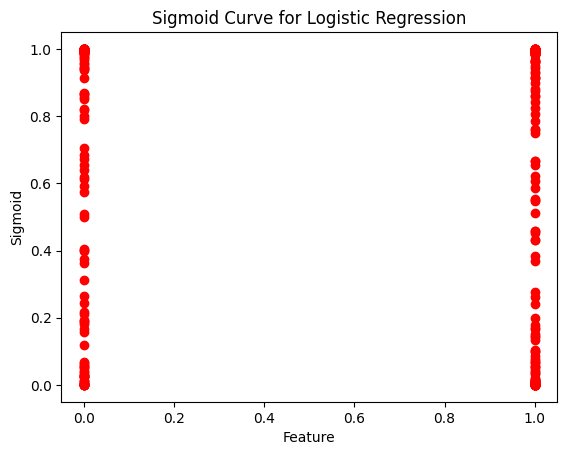

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Function to plot the sigmoid curve
def plot_sigmoid(model, X):
    z = np.dot(X, model.coef_.T) + model.intercept_
    sigmoid = 1 / (1 + np.exp(-z))
    plt.plot(X[:, 0], sigmoid, 'ro')
    plt.xlabel('Feature')
    plt.ylabel('Sigmoid')
    plt.title('Sigmoid Curve for Logistic Regression')
    plt.show()

# Plot sigmoid curve using the first feature in X_test_log
plot_sigmoid(logistic_model, X_test_log.values)

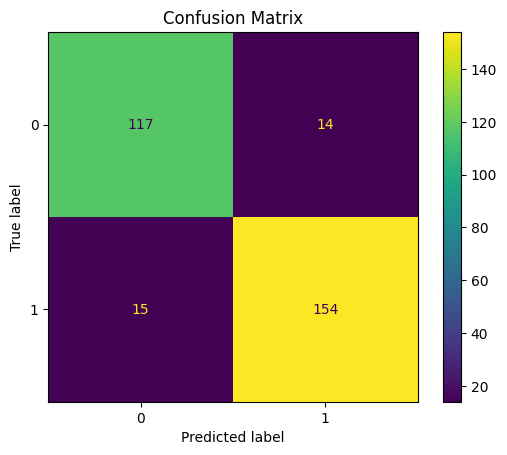

array([[117,  14],
       [ 15, 154]])

In [5]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Make predictions
y_pred_log = logistic_model.predict(X_test_log)

# Display confusion matrix
cm = confusion_matrix(y_test_log, y_pred_log)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logistic_model.classes_)
cm_display.plot()
plt.title('Confusion Matrix')
plt.show()

cm

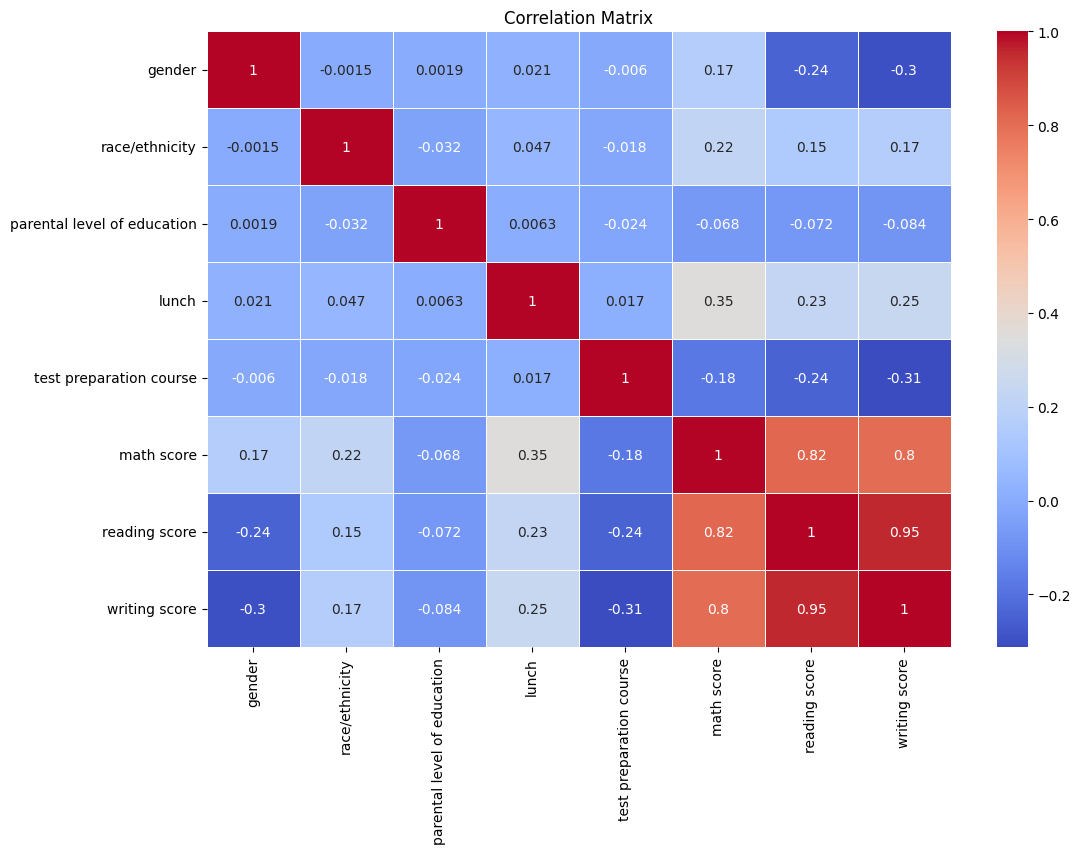

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
gender,1.000000,-0.001502,0.001913,0.021372,-0.006028,0.167982,-0.244313,-0.301225
race/ethnicity,-0.001502,1.000000,-0.031946,0.046563,-0.017508,0.216415,0.145253,0.165691
parental level of education,0.001913,-0.031946,1.000000,0.006320,-0.023968,-0.068279,-0.072444,-0.084299
lunch,0.021372,0.046563,0.006320,1.000000,0.017044,0.350877,0.229560,0.245769
test preparation course,-0.006028,-0.017508,-0.023968,0.017044,1.000000,-0.177702,-0.241780,-0.312946
math score,0.167982,0.216415,-0.068279,0.350877,-0.177702,1.000000,0.817580,0.802642
reading score,-0.244313,0.145253,-0.072444,0.229560,-0.241780,0.817580,1.000000,0.954598
writing score,-0.301225,0.165691,-0.084299,0.245769,-0.312946,0.802642,0.954598,1.000000


In [6]:
import seaborn as sns

# Correlation matrix
correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

correlation_matrix

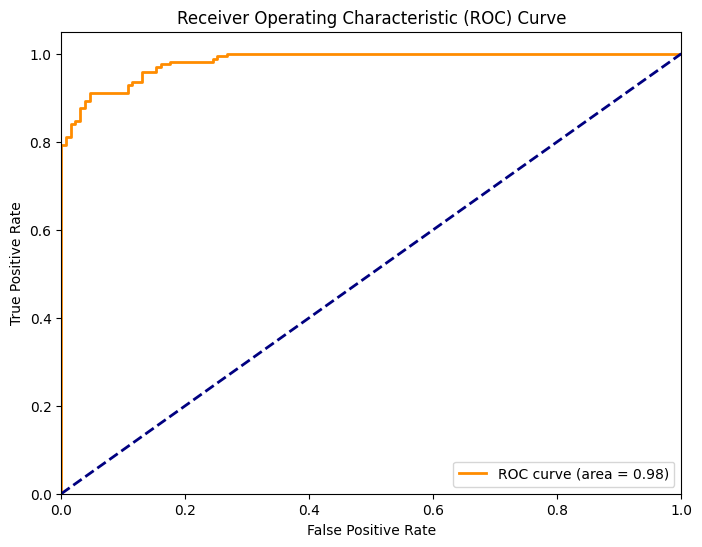

In [7]:
from sklearn.metrics import roc_curve, auc

# Calculate ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test_log, logistic_model.predict_proba(X_test_log)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

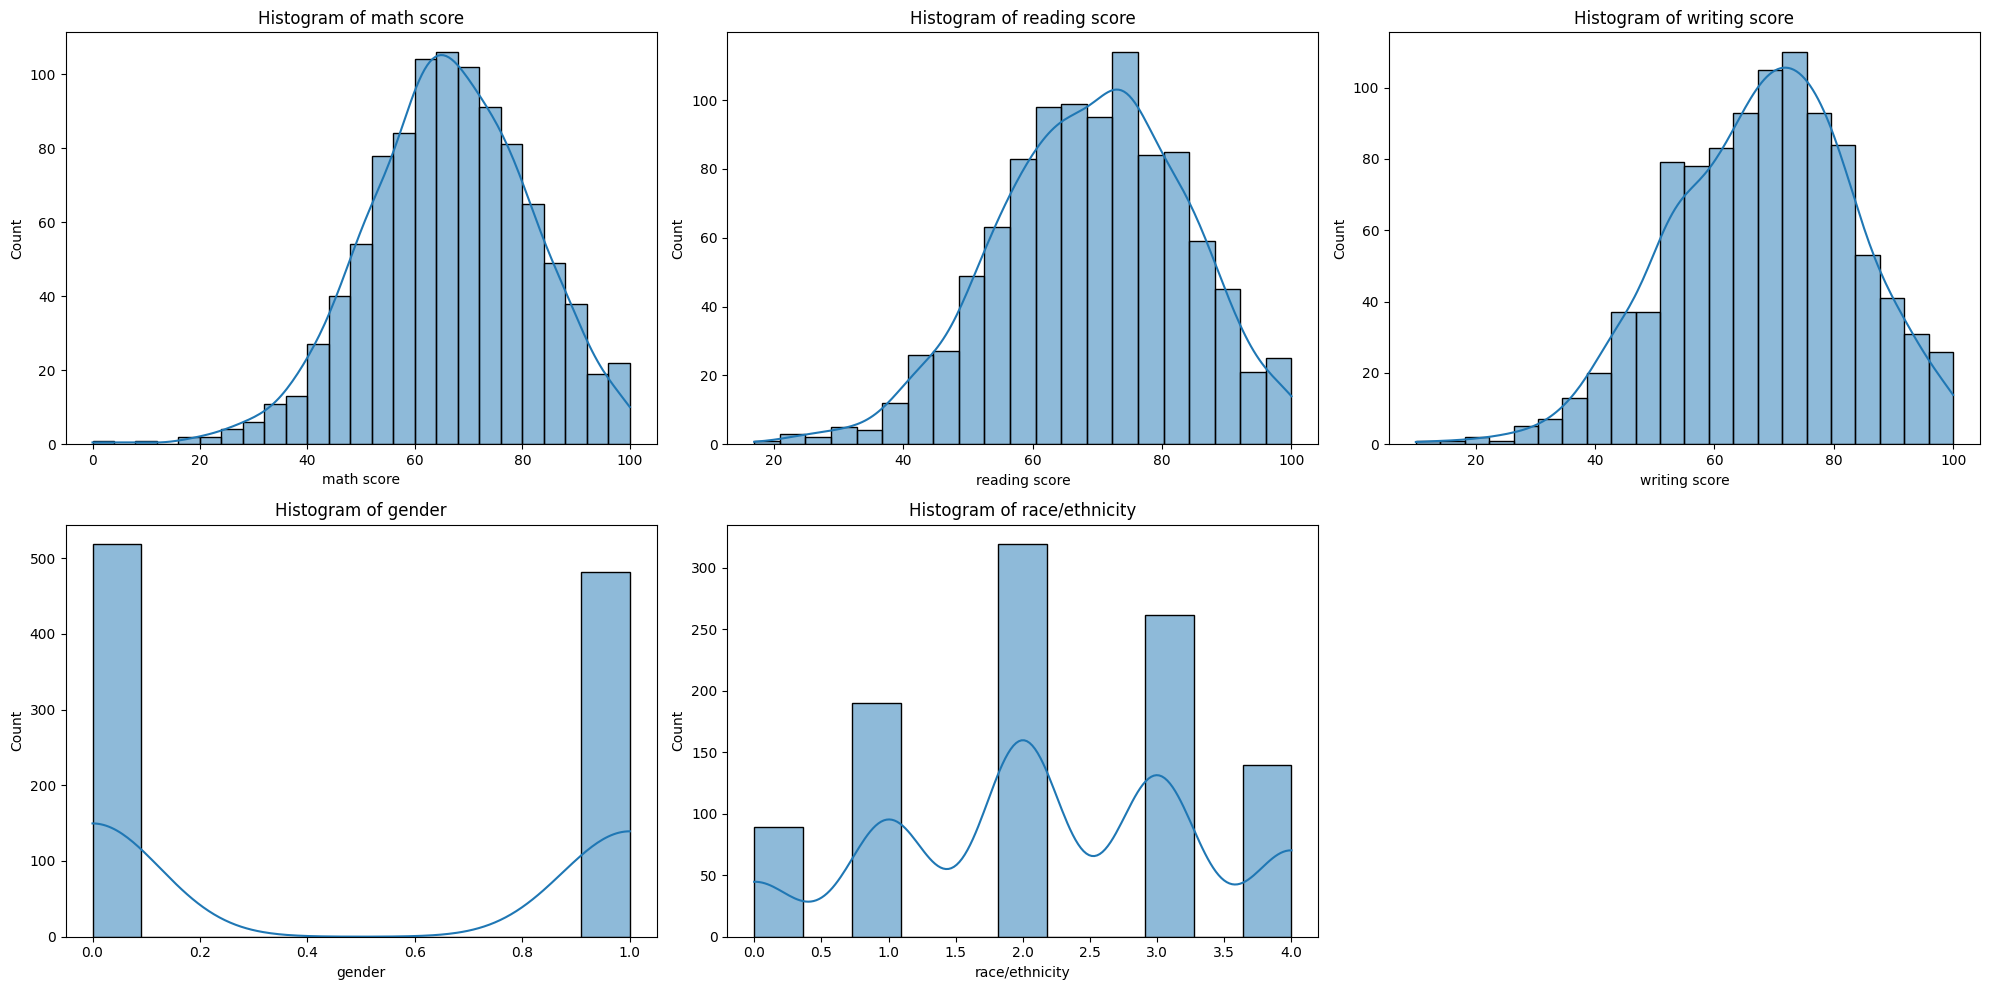

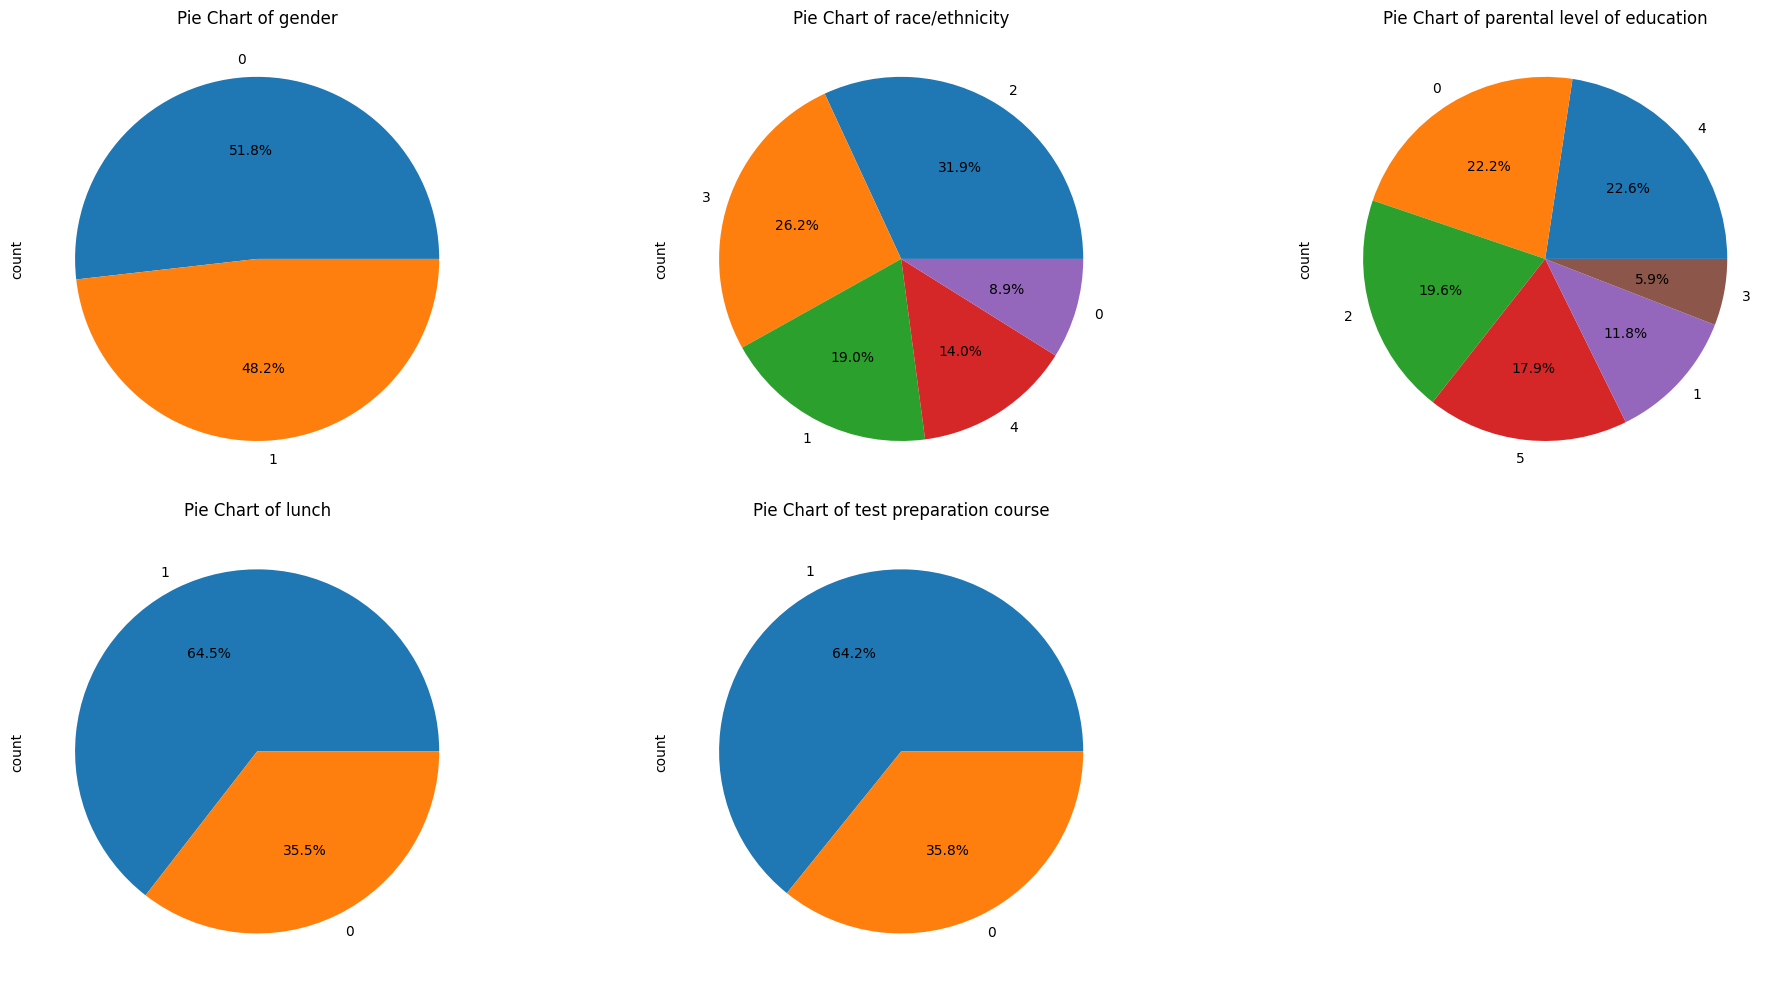

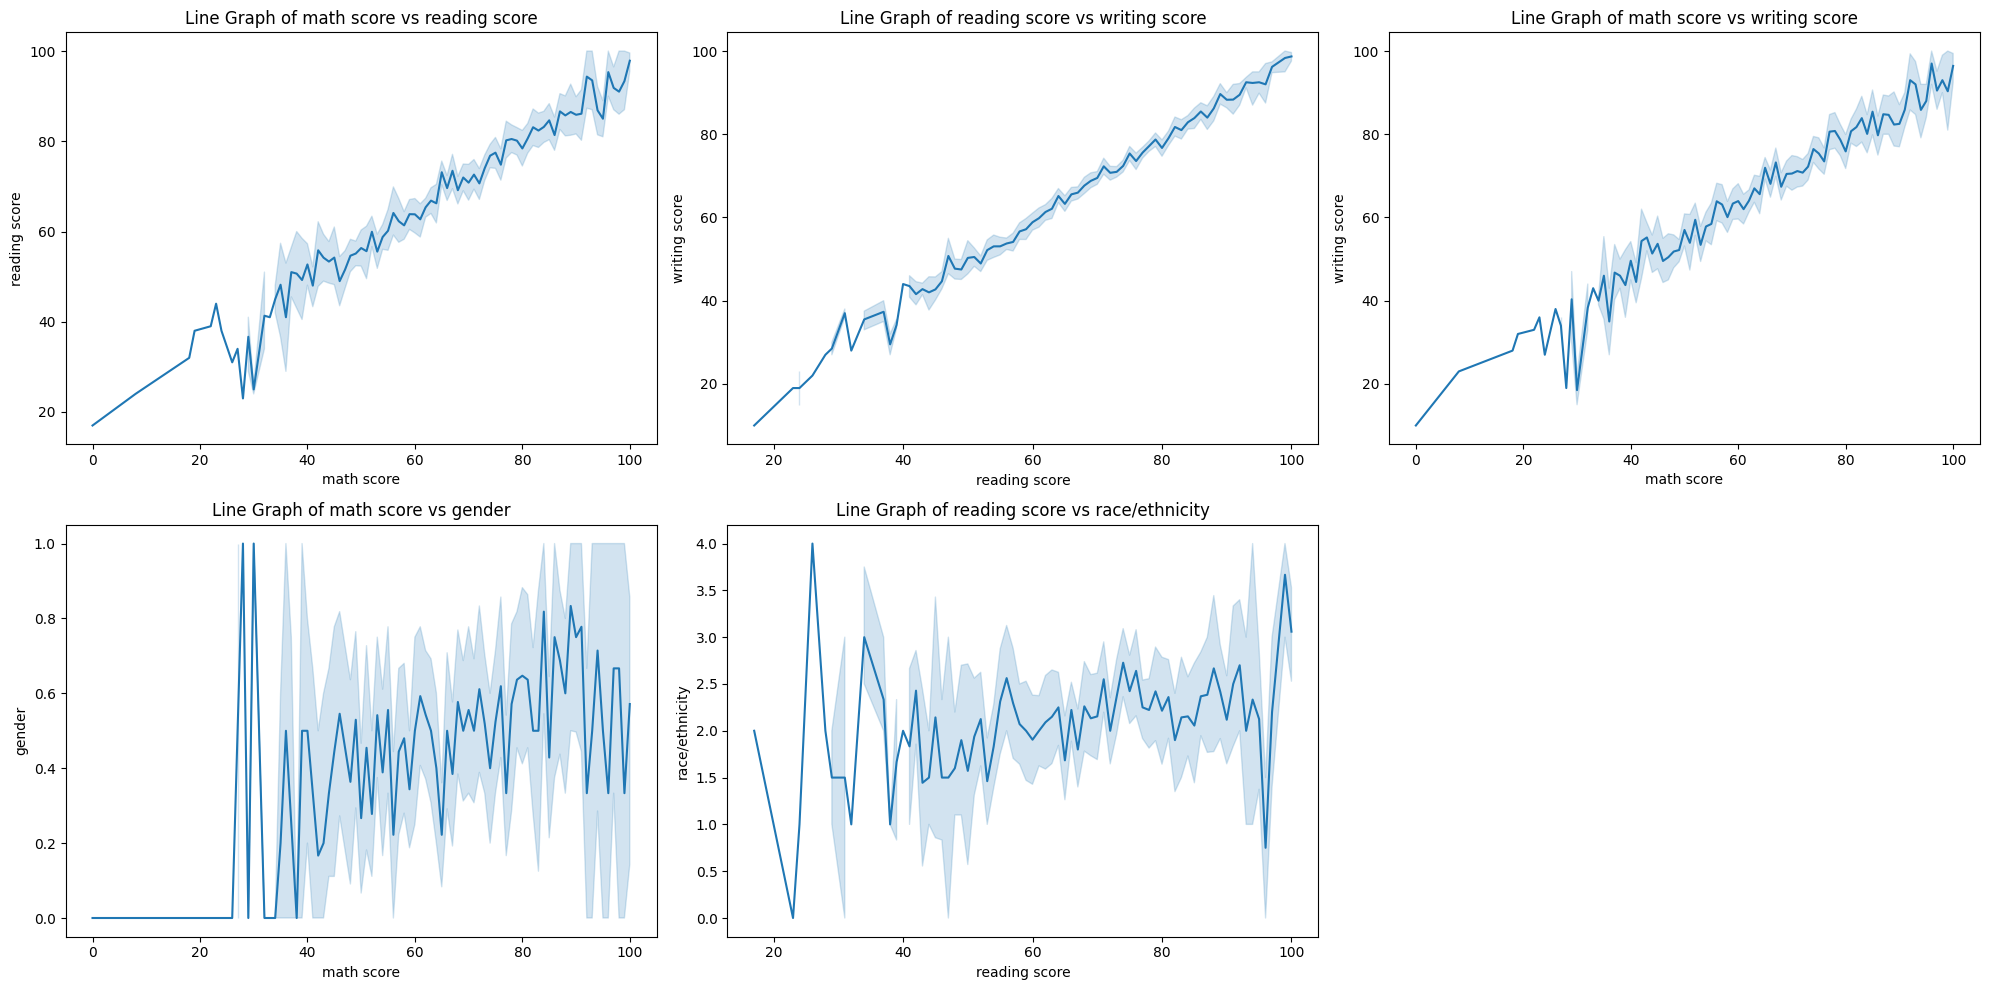

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram Plots
plt.figure(figsize=(20, 10))
for i, feature in enumerate(['math score', 'reading score', 'writing score', 'gender', 'race/ethnicity'], 1):
    plt.subplot(2, 3, i)
    sns.histplot(data[feature], kde=True)
    plt.title(f'Histogram of {feature}')
plt.tight_layout()
plt.show()

# Pie Charts
plt.figure(figsize=(20, 10))
for i, feature in enumerate(['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course'], 1):
    plt.subplot(2, 3, i)
    data[feature].value_counts().plot.pie(autopct='%1.1f%%')
    plt.title(f'Pie Chart of {feature}')
plt.tight_layout()
plt.show()

# Line Graphs
plt.figure(figsize=(20, 10))
for i, (feature1, feature2) in enumerate([('math score', 'reading score'), ('reading score', 'writing score'), ('math score', 'writing score'), ('math score', 'gender'), ('reading score', 'race/ethnicity')], 1):
    plt.subplot(2, 3, i)
    sns.lineplot(x=data[feature1], y=data[feature2])
    plt.title(f'Line Graph of {feature1} vs {feature2}')
plt.tight_layout()
plt.show()

<Figure size 1000x800 with 0 Axes>

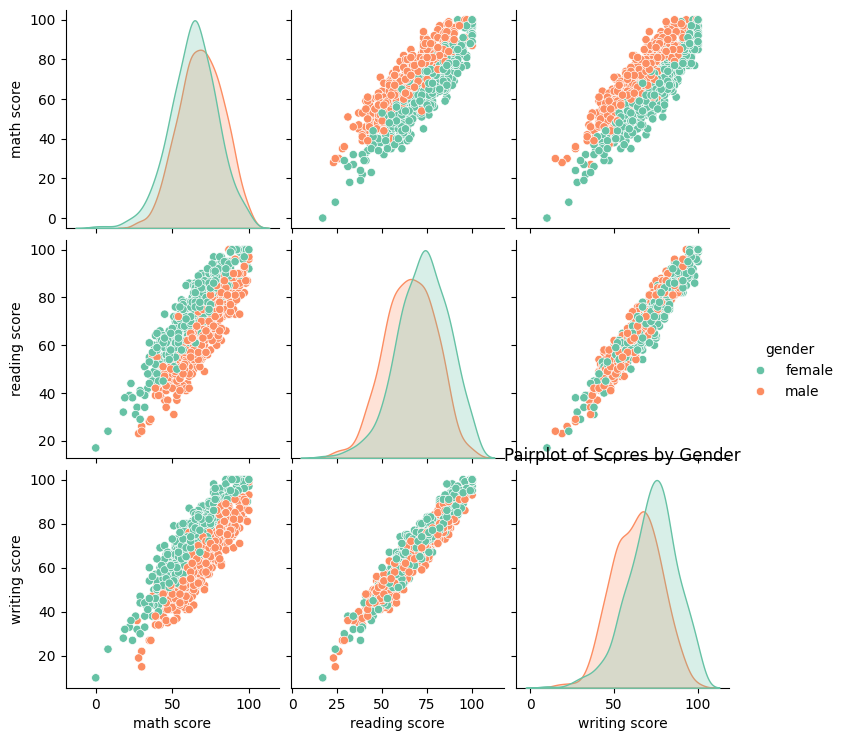

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset
data = pd.read_csv('E:\PROJECT-AI-ML\Student Performance Visualization\StudentsPerformance.csv')

# Pairplot
plt.figure(figsize=(10, 8))
sns.pairplot(data, hue='gender', palette='Set2')
plt.title('Pairplot of Scores by Gender')
plt.show()

C:\Users\Deeya Shalya\AppData\Local\Temp\ipykernel_19464\916376239.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='parental level of education', y='math score', data=data, palette='Set3')


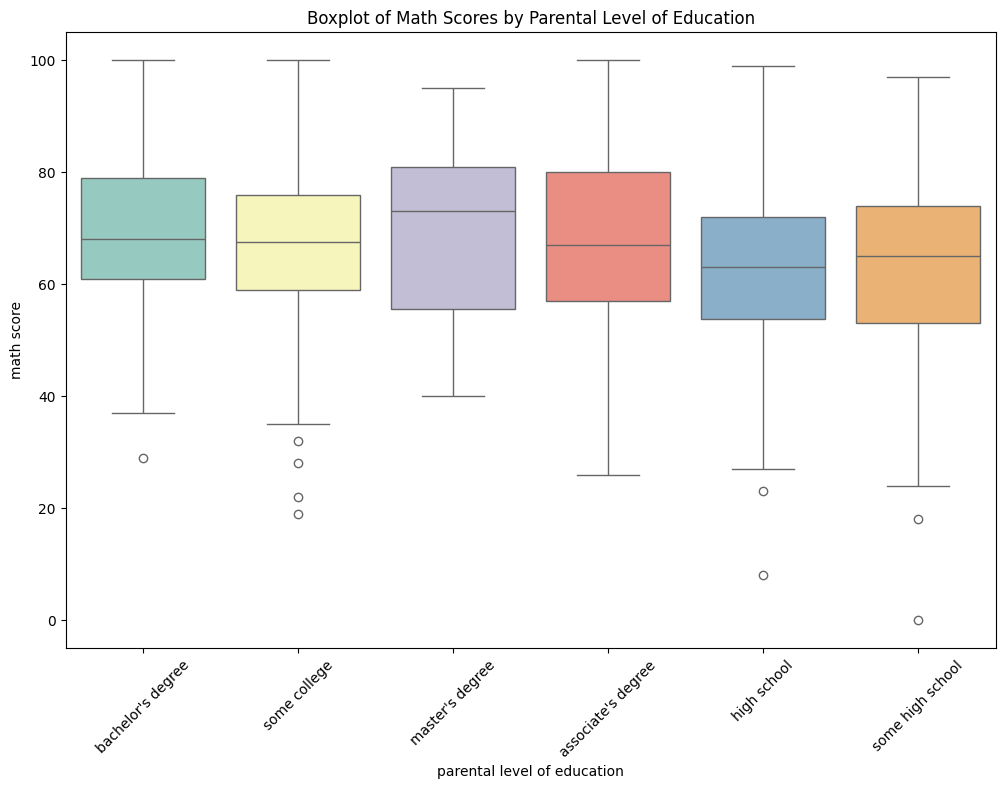

In [10]:
# Boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(x='parental level of education', y='math score', data=data, palette='Set3')
plt.title('Boxplot of Math Scores by Parental Level of Education')
plt.xticks(rotation=45)
plt.show()

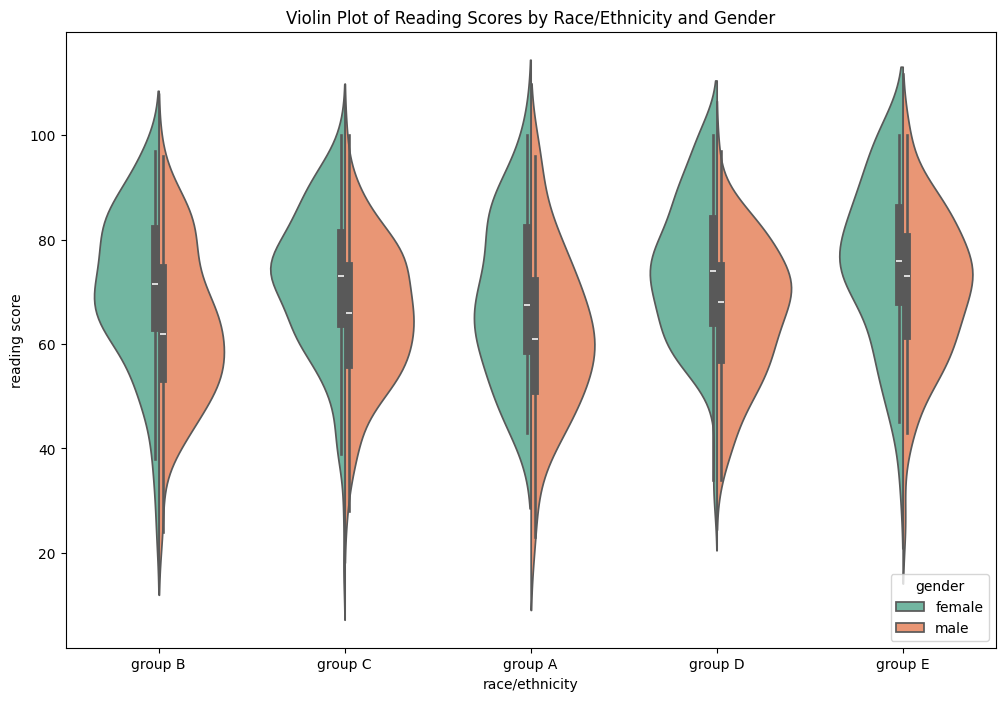

In [11]:
# Violin Plot
plt.figure(figsize=(12, 8))
sns.violinplot(x='race/ethnicity', y='reading score', hue='gender', data=data, split=True, palette='Set2')
plt.title('Violin Plot of Reading Scores by Race/Ethnicity and Gender')
plt.show()

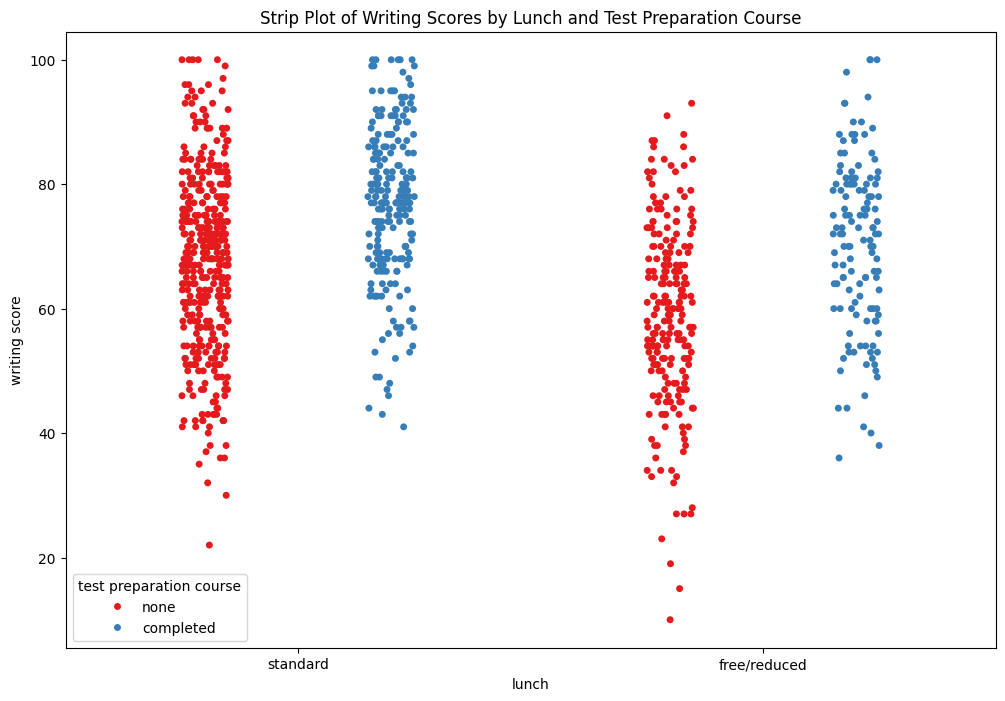

In [12]:
# Strip Plot
plt.figure(figsize=(12, 8))
sns.stripplot(x='lunch', y='writing score', hue='test preparation course', data=data, jitter=True, palette='Set1', dodge=True)
plt.title('Strip Plot of Writing Scores by Lunch and Test Preparation Course')
plt.show()

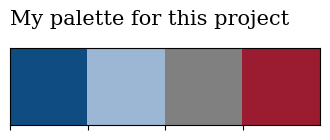

Gender Ratio:
gender  female  male
count     0.52  0.48


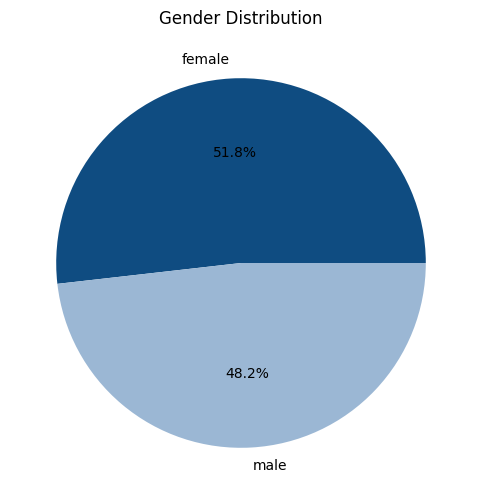

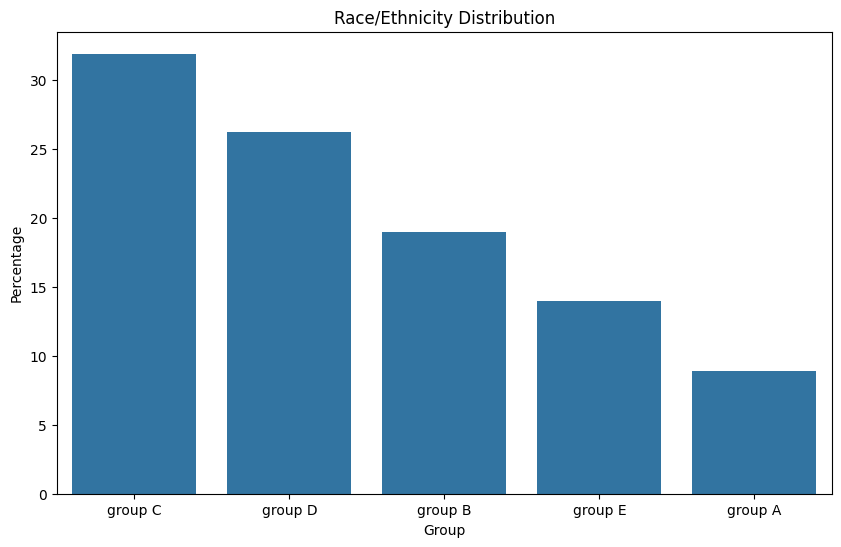

C:\Users\Deeya Shalya\AppData\Local\Temp\ipykernel_19464\2739694948.py:77: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=a_ed.index, y=a_ed.values, palette='Set3')


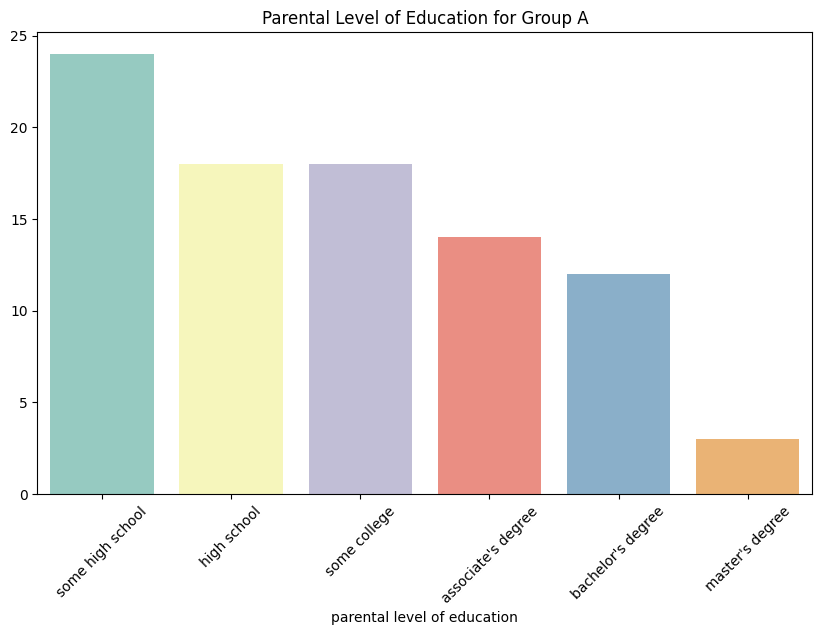

C:\Users\Deeya Shalya\AppData\Local\Temp\ipykernel_19464\2739694948.py:84: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=b_ed.index, y=b_ed.values, palette='Set3')


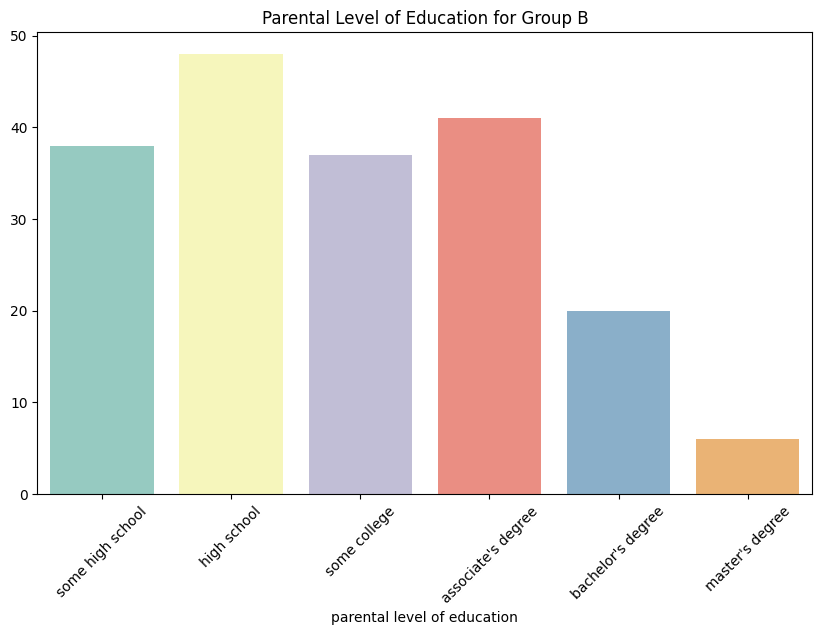

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('E:\PROJECT-AI-ML\Student Performance Visualization\StudentsPerformance.csv')

# Display a custom color palette
sns.palplot(['#0f4c81', '#9bb7d4', 'gray','#9b1b30'])
plt.title("My palette for this project", loc='left', fontfamily='serif', fontsize=15, y=1.2)
plt.show()

# Race/Ethnicity Distribution
eth_df = pd.DataFrame(data['race/ethnicity'].value_counts())
eth_df.columns = ['Count']
eth_df['Percentage'] = eth_df['Count'].apply(lambda x: (x / sum(eth_df['Count']) * 100))

eth_df = pd.DataFrame(eth_df.unstack()).reset_index(drop=False)
eth_df = eth_df.iloc[5:11, 1:3]
eth_df.columns = ["Group", "Percentage"]
eth_df = eth_df.reset_index(drop=True)
eth_df = eth_df.set_index('Group')
eth_df = eth_df.T

# Individual Groups
data['Count'] = 1

# Splitting data into groups
a_df = data[data["race/ethnicity"] == "group A"]
b_df = data[data["race/ethnicity"] == "group B"]
c_df = data[data["race/ethnicity"] == "group C"]
d_df = data[data["race/ethnicity"] == "group D"]
e_df = data[data["race/ethnicity"] == "group E"]

# A group count
a_count_df = pd.DataFrame(a_df["race/ethnicity"].value_counts()).reset_index(drop=False)
a_count_df.columns = ["Group", "Count"]

# B group count
b_count_df = pd.DataFrame(b_df["race/ethnicity"].value_counts()).reset_index(drop=False)
b_count_df.columns = ["Group", "Count"]

# Parental Education Order
par_ed_order = ['some high school', 'high school', 'some college', "associate's degree", "bachelor's degree", "master's degree"]

a_ed = a_df['parental level of education'].value_counts()[par_ed_order]
b_ed = b_df['parental level of education'].value_counts()[par_ed_order]
c_ed = c_df['parental level of education'].value_counts()[par_ed_order]
d_ed = d_df['parental level of education'].value_counts()[par_ed_order]
e_ed = e_df['parental level of education'].value_counts()[par_ed_order]

# Gender Ratio
gender_count = data['gender'].value_counts()
total_count = len(data)
gender_ratio = (gender_count / total_count).round(2)
mf_ratio = pd.DataFrame(gender_ratio).T

# Display Gender Ratio
print("Gender Ratio:")
print(mf_ratio)

# Plotting
plt.figure(figsize=(10, 6))
plt.pie(gender_count, labels=gender_count.index, autopct='%1.1f%%', colors=['#0f4c81', '#9bb7d4'])
plt.title('Gender Distribution')
plt.show()

# Race/Ethnicity Distribution Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=eth_df.columns, y=eth_df.iloc[0])
plt.title('Race/Ethnicity Distribution')
plt.ylabel('Percentage')
plt.show()

# Parental Level of Education Plot for Group A
plt.figure(figsize=(10, 6))
sns.barplot(x=a_ed.index, y=a_ed.values, palette='Set3')
plt.title("Parental Level of Education for Group A")
plt.xticks(rotation=45)
plt.show()

# Parental Level of Education Plot for Group B
plt.figure(figsize=(10, 6))
sns.barplot(x=b_ed.index, y=b_ed.values, palette='Set3')
plt.title("Parental Level of Education for Group B")
plt.xticks(rotation=45)
plt.show()

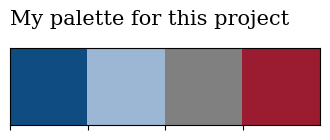

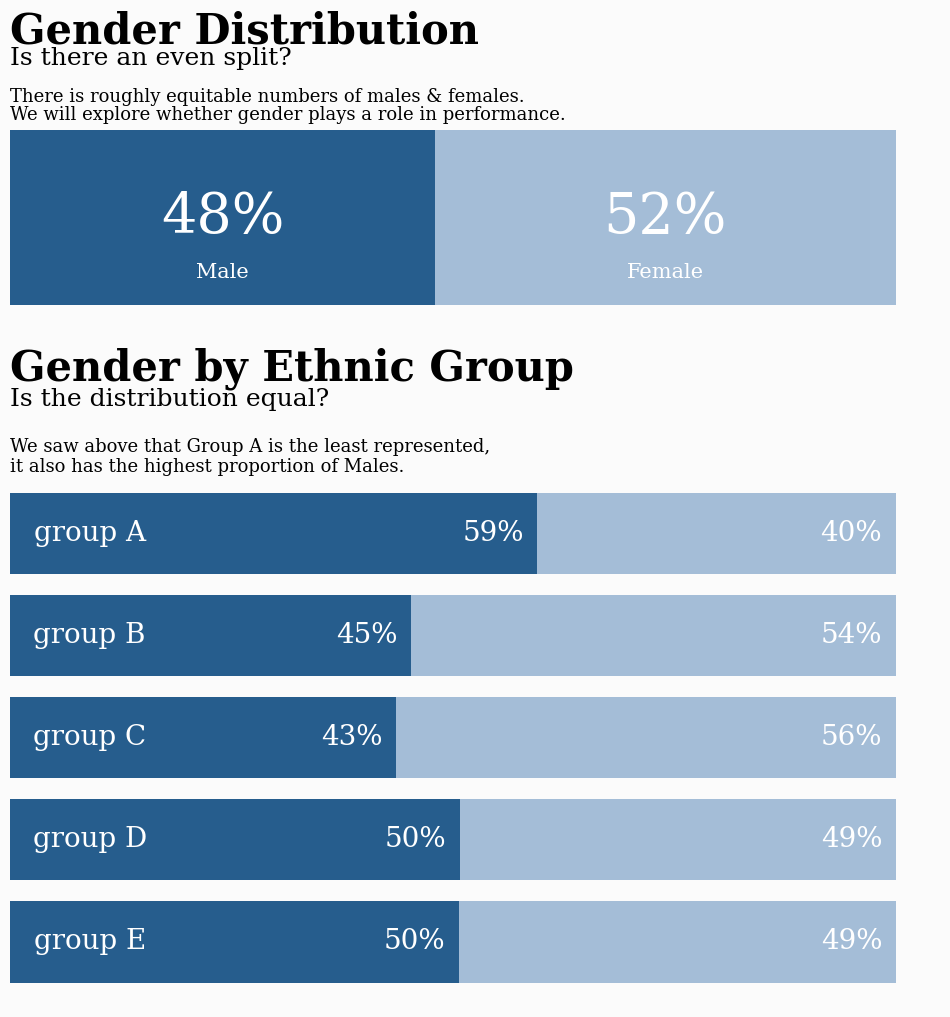

C:\Users\Deeya Shalya\AppData\Local\Temp\ipykernel_19464\253820133.py:127: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=a_ed.index, y=a_ed.values, palette='Set3')


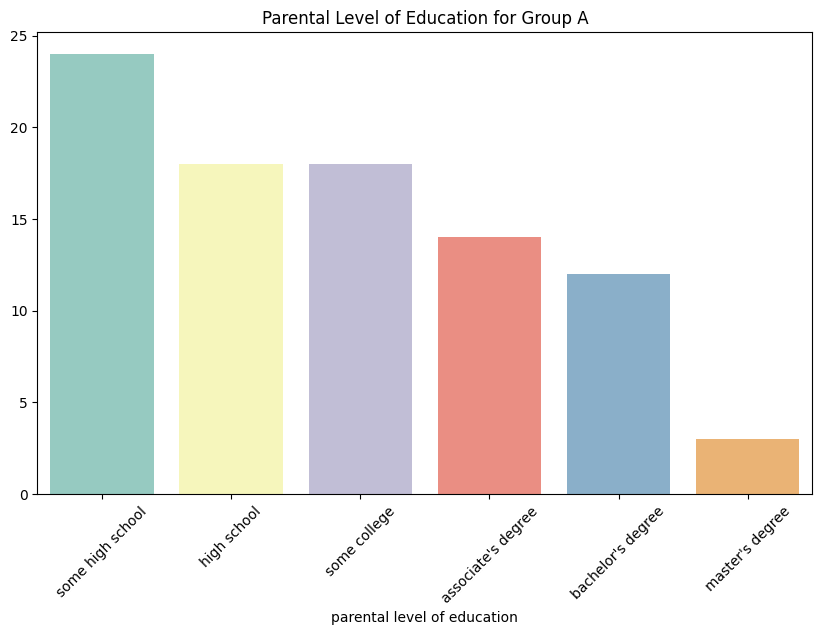

C:\Users\Deeya Shalya\AppData\Local\Temp\ipykernel_19464\253820133.py:134: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=b_ed.index, y=b_ed.values, palette='Set3')


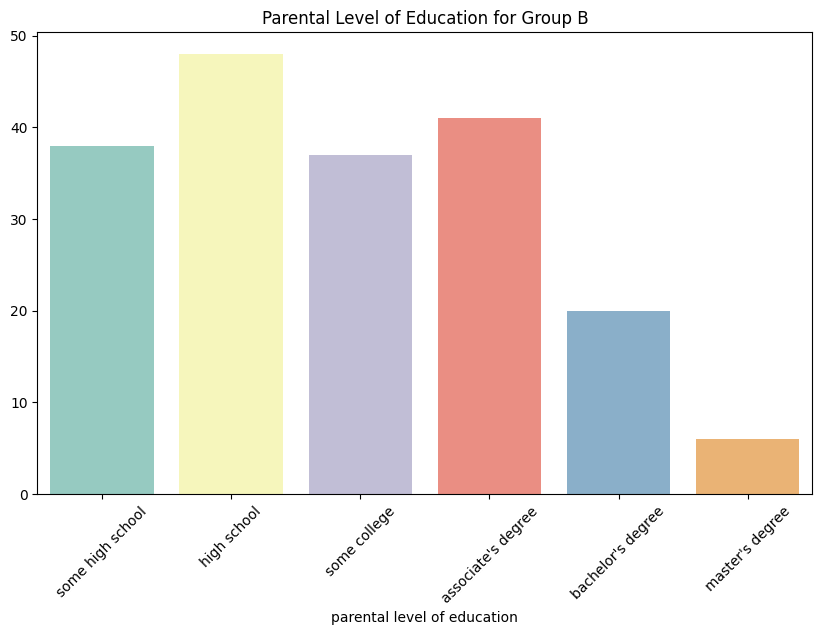

C:\Users\Deeya Shalya\AppData\Local\Temp\ipykernel_19464\253820133.py:141: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=c_ed.index, y=c_ed.values, palette='Set3')


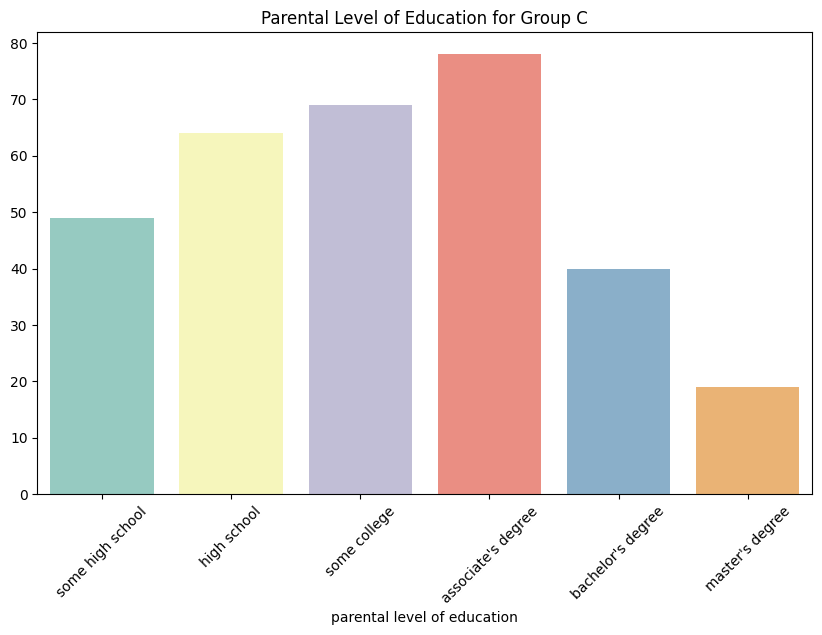

C:\Users\Deeya Shalya\AppData\Local\Temp\ipykernel_19464\253820133.py:148: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=d_ed.index, y=d_ed.values, palette='Set3')


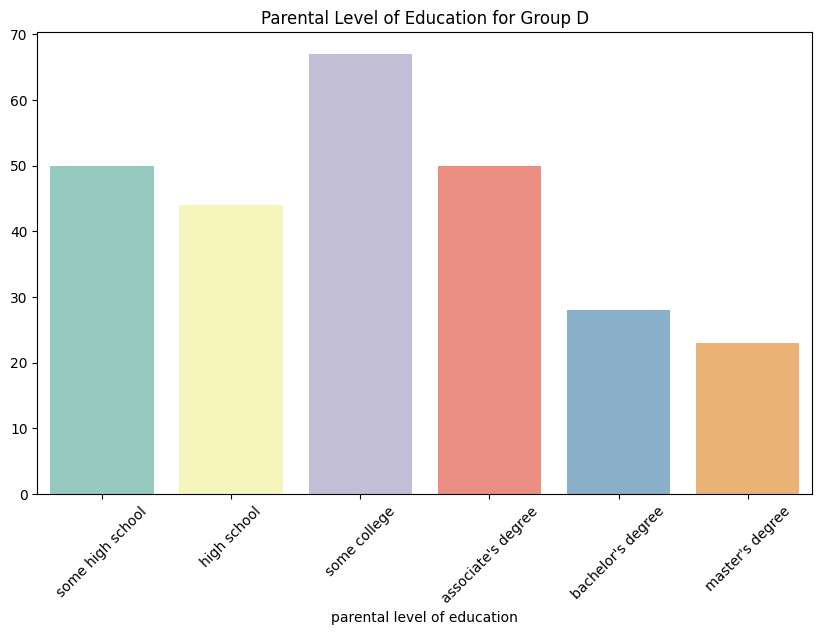

C:\Users\Deeya Shalya\AppData\Local\Temp\ipykernel_19464\253820133.py:155: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=e_ed.index, y=e_ed.values, palette='Set3')


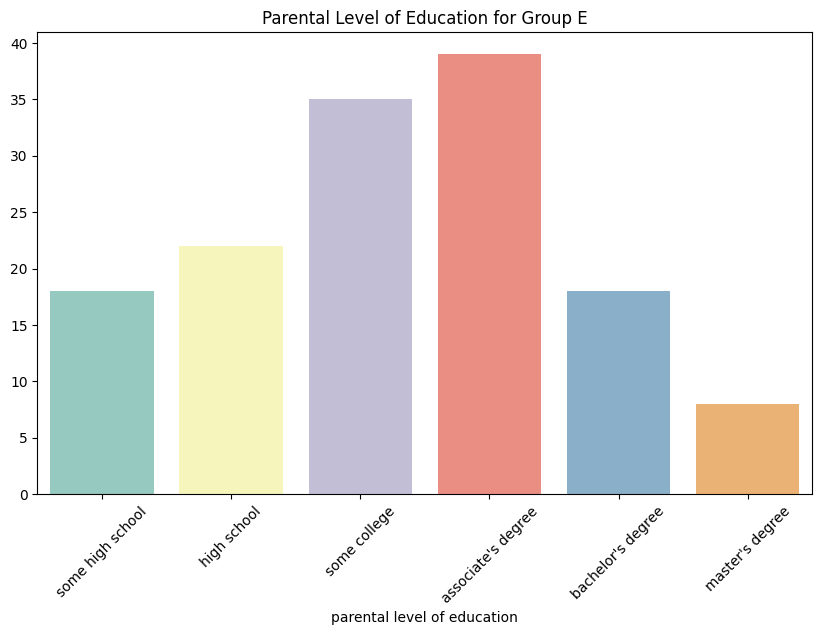

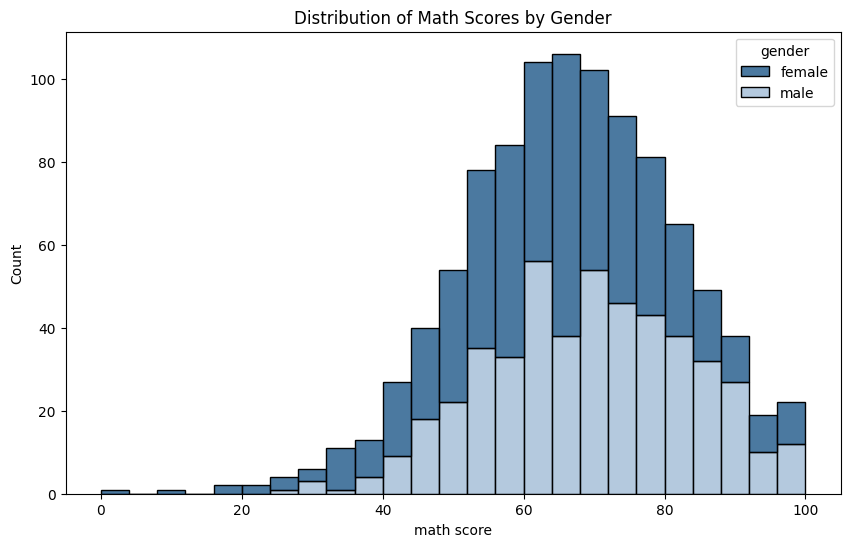

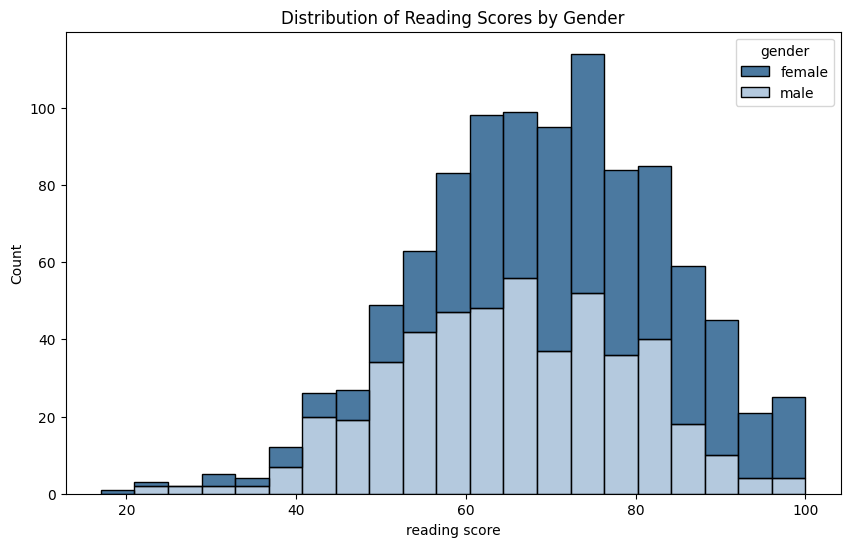

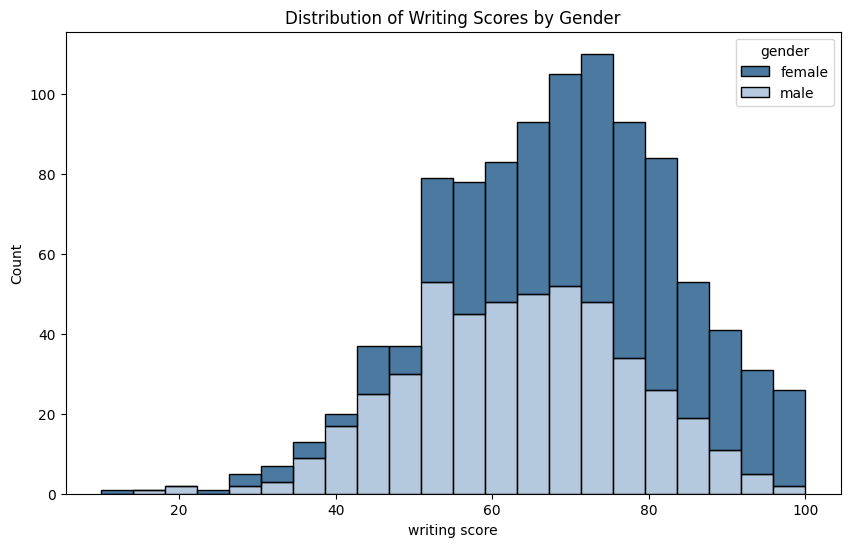

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('E:\PROJECT-AI-ML\Student Performance Visualization\StudentsPerformance.csv')

# Display a custom color palette
sns.palplot(['#0f4c81', '#9bb7d4', 'gray', '#9b1b30'])
plt.title("My palette for this project", loc='left', fontfamily='serif', fontsize=15, y=1.2)
plt.show()

# Useful data
eth_df = pd.DataFrame(data['race/ethnicity'].value_counts())
eth_df.columns = ['Count']
eth_df['Percentage'] = eth_df['Count'].apply(lambda x: (x / sum(eth_df['Count']) * 100))

eth_df = pd.DataFrame(eth_df.unstack()).reset_index(drop=False)
eth_df = eth_df.iloc[5:11, 1:3]
eth_df.columns = ["Group", "Percentage"]
eth_df = eth_df.reset_index(drop=True)
eth_df = eth_df.set_index('Group')
eth_df = eth_df.T

# Individual groups
data['Count'] = 1

# Splitting data into groups
a_df = data[data["race/ethnicity"] == "group A"]
b_df = data[data["race/ethnicity"] == "group B"]
c_df = data[data["race/ethnicity"] == "group C"]
d_df = data[data["race/ethnicity"] == "group D"]
e_df = data[data["race/ethnicity"] == "group E"]

# Gender
gender_count = data['gender'].value_counts()
total_count = len(data)
gender_ratio = (gender_count / total_count).round(2)
mf_ratio = pd.DataFrame(gender_ratio).T

# Setting up figure and axes
fig = plt.figure(figsize=(12, 16))  # Create figure
gs = fig.add_gridspec(4, 2)
gs.update(wspace=0, hspace=0.8)
ax0 = fig.add_subplot(gs[0, 0:2])
ax1 = fig.add_subplot(gs[1:3, 0:2])  # Create axes

# Color selection
color_map = ["#bdbdbd" for _ in range(6)]
color_map[0] = "#008294"

# Change background color
background_color = "#fbfbfb"
fig.patch.set_facecolor(background_color)  # Figure background color
ax0.set_facecolor(background_color)  # Axes background color
ax1.set_facecolor(background_color)  # Axes background color

ax0.barh(mf_ratio.index, mf_ratio['male'], color='#0f4c81', alpha=0.9, label='Male')
ax0.barh(mf_ratio.index, mf_ratio['female'], left=mf_ratio['male'], color='#9bb7d4', alpha=0.9, label='Female')

# Annotations percentage
for i in mf_ratio.index:
    ax0.annotate(f"{int(mf_ratio['male'][i]*100)}%", 
                 xy=(mf_ratio['male'][i]/2, i),
                 va='center', ha='center', fontsize=40, fontweight='light', fontfamily='serif',
                 color='white')
    ax0.annotate("Male", 
                 xy=(mf_ratio['male'][i]/2, -0.25),
                 va='center', ha='center', fontsize=15, fontweight='light', fontfamily='serif',
                 color='white')
    ax0.annotate(f"{int(mf_ratio['female'][i]*100)}%", 
                 xy=(mf_ratio['male'][i]+mf_ratio['female'][i]/2, i),
                 va='center', ha='center', fontsize=40, fontweight='light', fontfamily='serif',
                 color='white')
    ax0.annotate("Female", 
                 xy=(mf_ratio['male'][i]+mf_ratio['female'][i]/2, -0.25),
                 va='center', ha='center', fontsize=15, fontweight='light', fontfamily='serif',
                 color='white')

# Data
ethnicity_order = ['group A', 'group B', 'group C', 'group D', 'group E']
race_gen = data.groupby('race/ethnicity')['gender'].value_counts().unstack().loc[ethnicity_order]
race_gen['sum'] = race_gen.sum(axis=1)
race_gen_ratio = (race_gen.T / race_gen['sum']).T[['male', 'female']][::-1]

# Plot
ax1.barh(race_gen_ratio.index, race_gen_ratio['male'], color='#0f4c81', alpha=0.9, label='Male')
ax1.barh(race_gen_ratio.index, race_gen_ratio['female'], left=race_gen_ratio['male'], color='#9bb7d4', alpha=0.9, label='Female')

# Male percentage
for i in race_gen_ratio.index:
    ax1.annotate(f"{int(race_gen_ratio['male'][i]*100)}%", xy=(race_gen_ratio['male'][i]-0.05, i),
                 va='center', ha='center', fontsize=20, fontweight='light', fontfamily='serif', color='white')
    ax1.annotate(f"{int(race_gen_ratio['female'][i]*100)}%", xy=(race_gen_ratio['male'][i]+race_gen_ratio['female'][i]-0.05, i),
                 va='center', ha='center', fontsize=20, fontweight='light', fontfamily='serif', color='white')
    # Group name
    ax1.annotate(i, xy=(0.09, i),
                 va='center', ha='center', fontsize=20, fontweight='light', fontfamily='serif', color='white')

ax0.text(0, 0.8, 'Gender Distribution', fontsize=30, fontweight='bold', fontfamily='serif')
ax0.text(0, 0.7, 'Is there an even split?', fontsize=18, fontweight='light', fontfamily='serif')
ax0.text(0, 0.53, 'There is roughly equitable numbers of males & females.', fontsize=13, fontweight='light', fontfamily='serif')
ax0.text(0, 0.45, 'We will explore whether gender plays a role in performance.', fontsize=13, fontweight='light', fontfamily='serif')

ax1.text(0, 5.5, 'Gender by Ethnic Group', fontsize=30, fontweight='bold', fontfamily='serif')
ax1.text(0, 5.25, 'Is the distribution equal?', fontsize=18, fontweight='light', fontfamily='serif')
ax1.text(0, 4.8, 'We saw above that Group A is the least represented,', fontsize=13, fontweight='light', fontfamily='serif')
ax1.text(0, 4.6, 'it also has the highest proportion of Males.', fontsize=13, fontweight='light', fontfamily='serif')

for s in ['top', 'left', 'right', 'bottom']:
    ax0.spines[s].set_visible(False)
    ax1.spines[s].set_visible(False)

ax0.set_yticklabels([])
ax0.tick_params(axis=u'both', which=u'both', length=0)
ax1.tick_params(axis=u'both', which=u'both', length=0)

ax0.set_xticks([])
ax0.set_yticks([])
ax1.set_xticks([])
ax1.set_yticks([])

plt.show()

# Parental Level of Education Plot for Group A
plt.figure(figsize=(10, 6))
sns.barplot(x=a_ed.index, y=a_ed.values, palette='Set3')
plt.title("Parental Level of Education for Group A")
plt.xticks(rotation=45)
plt.show()

# Parental Level of Education Plot for Group B
plt.figure(figsize=(10, 6))
sns.barplot(x=b_ed.index, y=b_ed.values, palette='Set3')
plt.title("Parental Level of Education for Group B")
plt.xticks(rotation=45)
plt.show()

# Parental Level of Education Plot for Group C
plt.figure(figsize=(10, 6))
sns.barplot(x=c_ed.index, y=c_ed.values, palette='Set3')
plt.title("Parental Level of Education for Group C")
plt.xticks(rotation=45)
plt.show()

# Parental Level of Education Plot for Group D
plt.figure(figsize=(10, 6))
sns.barplot(x=d_ed.index, y=d_ed.values, palette='Set3')
plt.title("Parental Level of Education for Group D")
plt.xticks(rotation=45)
plt.show()

# Parental Level of Education Plot for Group E
plt.figure(figsize=(10, 6))
sns.barplot(x=e_ed.index, y=e_ed.values, palette='Set3')
plt.title("Parental Level of Education for Group E")
plt.xticks(rotation=45)
plt.show()

# Scores distribution by gender
plt.figure(figsize=(10, 6))
sns.histplot(data, x='math score', hue='gender', multiple='stack', palette=['#0f4c81', '#9bb7d4'])
plt.title('Distribution of Math Scores by Gender')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data, x='reading score', hue='gender', multiple='stack', palette=['#0f4c81', '#9bb7d4'])
plt.title('Distribution of Reading Scores by Gender')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data, x='writing score', hue='gender', multiple='stack', palette=['#0f4c81', '#9bb7d4'])
plt.title('Distribution of Writing Scores by Gender')
plt.show()

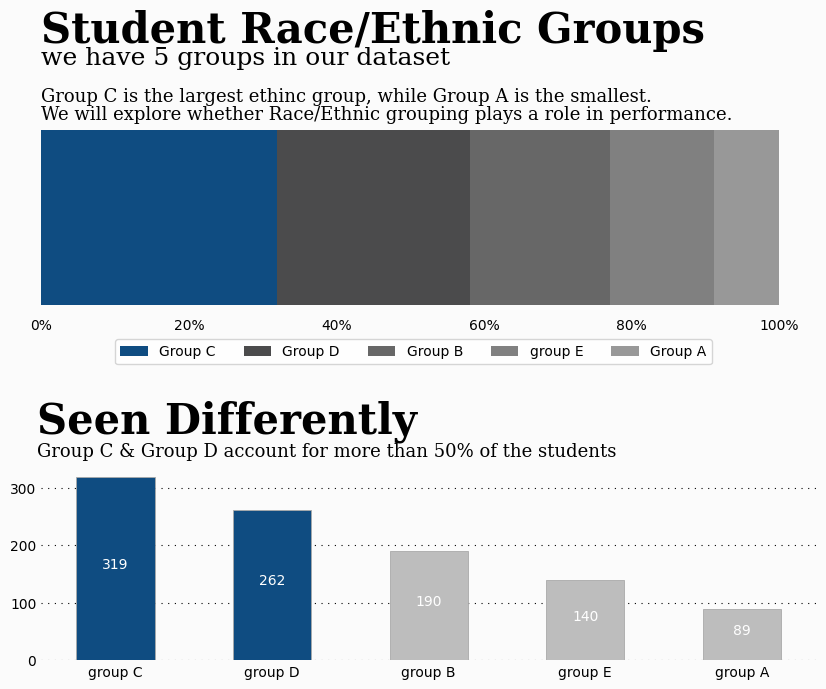

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# Load your dataset
df = pd.read_csv('E:/PROJECT-AI-ML/Student Performance Visualization/StudentsPerformance.csv')

# Setting up figure and axes
fig = plt.figure(figsize=(10,16)) # create figure
gs = fig.add_gridspec(4, 2)
gs.update(wspace=0, hspace=0.8)
ax0 = fig.add_subplot(gs[0, 0:2])
ax1 = fig.add_subplot(gs[1, 0:2]) # create axes


# Color selection
color_map = ["#bdbdbd" for _ in range(6)]
color_map[0] = color_map[1] = "#0f4c81"

# Change background color
background_color = "#fbfbfb"
fig.patch.set_facecolor(background_color) # figure background color
ax0.set_facecolor(background_color) # axes background color
ax1.set_facecolor(background_color) # axes background color


# Group stacking
ax0.barh(eth_df.index, eth_df['group C'],color="#0f4c81", zorder=3, label="Group C")
ax0.barh(eth_df.index, eth_df['group D'], left=eth_df['group C'],color="#4b4b4c", zorder=3, label="Group D")
ax0.barh(eth_df.index, eth_df['group B'], left=eth_df['group C']+eth_df['group D'],color="#676767", zorder=3, label="Group B")
ax0.barh(eth_df.index, eth_df['group E'], left=eth_df['group C']+eth_df['group D']+eth_df['group B'],color="#808080", zorder=3, label="group E")
ax0.barh(eth_df.index, eth_df['group A'], left=eth_df['group C']+eth_df['group D']+eth_df['group B']+eth_df['group E'],color="#989898", zorder=3, label="Group A")

ax0.xaxis.set_major_formatter(mtick.PercentFormatter())    
ax0.legend(loc='lower center', ncol=6, bbox_to_anchor=(0.48, -0.3))


ax0.text(0, 0.8, 
         'Student Race/Ethnic Groups', 
         fontsize=30, 
         fontweight='bold', 
         fontfamily='serif')

ax0.text(0, 0.7, 
         'we have 5 groups in our dataset', 
         fontsize=18, 
         fontweight='light', 
         fontfamily='serif')

ax0.text(0, 0.53, 
         'Group C is the largest ethinc group, while Group A is the smallest.', 
         fontsize=13, 
         fontweight='light', 
         fontfamily='serif')

ax0.text(0, 0.45, 
         'We will explore whether Race/Ethnic grouping plays a role in performance.', 
         fontsize=13, 
         fontweight='light', 
         fontfamily='serif')


# Another view
# Order for plotting categorical vars

ethnicity_order = ['group A','group B','group C','group D', 'group E']

ethnicity = df['race/ethnicity'].value_counts()#[ethnicity_order]

# Plot

ax1.bar(ethnicity.index, ethnicity, width=0.5, edgecolor='darkgray',linewidth=0.6,color=color_map)


# Annotations percentage
#annotations - on just one plot in this example
for x, val in zip(ethnicity.index, ethnicity):
    ax1.text(x=x, y=val/2, s=str(val), ha='center', c='white' )
    
ax1.text(-0.5, 395, 
         'Seen Differently', 
         fontsize=30, 
         fontweight='bold', 
         fontfamily='serif')

ax1.text(-0.5, 355, 
         'Group C & Group D account for more than 50% of the students', 
         fontsize=13, 
         fontweight='light', 
         fontfamily='serif')

# Title & Subtitle
#fig.text(0.125,1.03,'Gender distribution', fontfamily='serif',fontsize=15, fontweight='bold')
#fig.text(0.125,0.92,'We see roughly equivalent males & females in our dataset.',fontfamily='serif',fontsize=12)  

for s in ['top', 'left', 'right', 'bottom']:
    ax0.spines[s].set_visible(False)
    ax1.spines[s].set_visible(False)




ax1.grid(color='black', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax1.set_axisbelow(True)

ax0.set_yticklabels([])
ax0.tick_params(axis=u'both', which=u'both',length=0)
ax1.tick_params(axis=u'both', which=u'both',length=0)
plt.show()

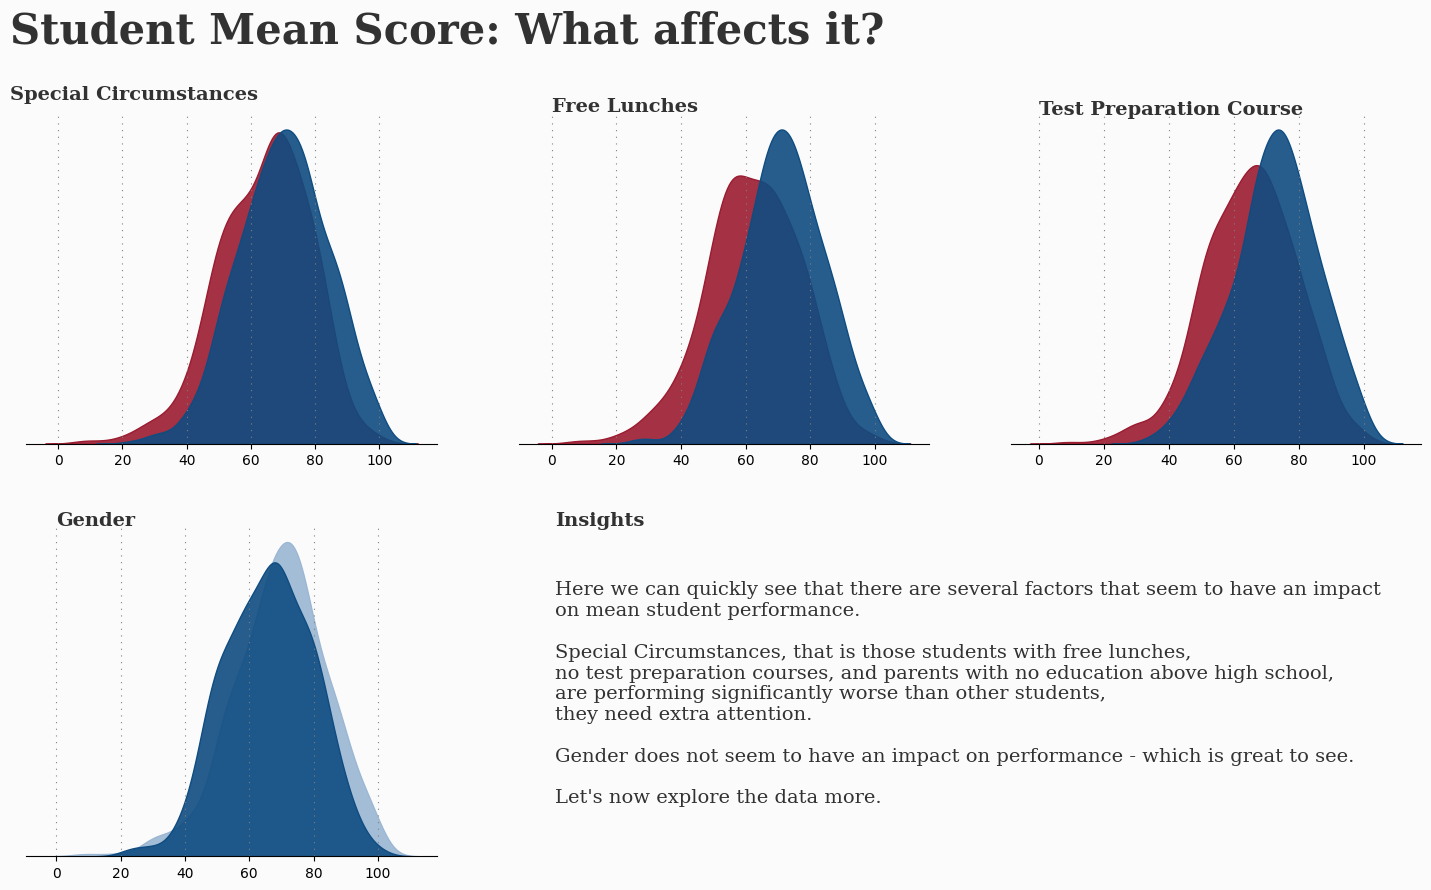

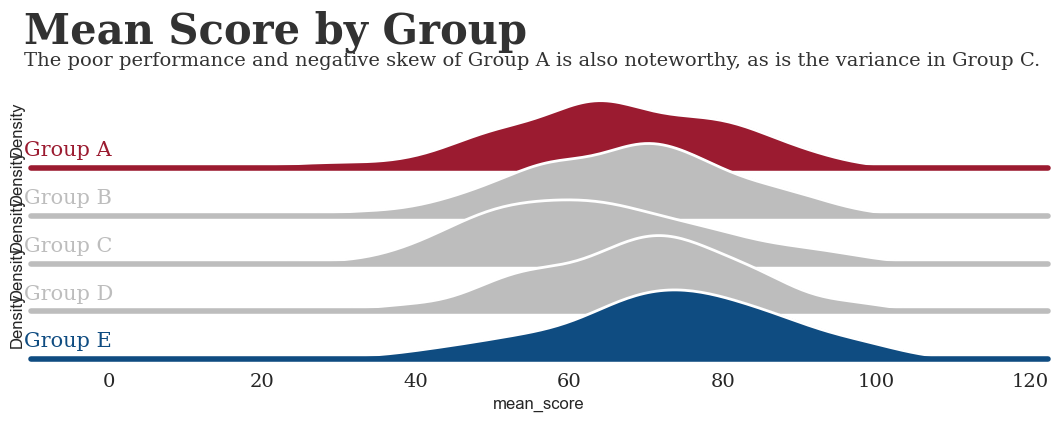

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# Assuming 'mean_score' is the average of 'math score', 'reading score', and 'writing score'
df['mean_score'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)

# Define the figure and subplots
fig = plt.figure(figsize=(18, 15))
gs = fig.add_gridspec(3, 3)
gs.update(wspace=0.2, hspace=0.25)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[0, 2])
ax3 = fig.add_subplot(gs[1, 0])

# Change background color
background_color = "#fbfbfb"
fig.patch.set_facecolor(background_color)
ax0.set_facecolor(background_color)
ax1.set_facecolor(background_color)
ax2.set_facecolor(background_color)
ax3.set_facecolor(background_color)

# Filter data by gender
male_only = df[df['gender'] == 'male']
female_only = df[df['gender'] == 'female']

# Gender plot
ax3.grid(color='gray', linestyle=':', axis='y', zorder=0, dashes=(1, 5))
sns.kdeplot(female_only["mean_score"], ax=ax3, color="#9bb7d4", alpha=0.9, fill=True, label="Female")
sns.kdeplot(male_only["mean_score"], ax=ax3, color="#0f4c81", alpha=0.9, fill=True, label="Male")
ax3.text(0, 0.03, 'Gender', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
ax3.yaxis.set_major_locator(mtick.MultipleLocator(0.01))

# Lunch plot
lunch_only = df[df['lunch'] == 'free/reduced']
nolunch_only = df[df['lunch'] == 'standard']
ax1.grid(color='gray', linestyle=':', axis='y', zorder=0, dashes=(1, 5))
sns.kdeplot(lunch_only["mean_score"], ax=ax1, color="#9b1b30", alpha=0.9, fill=True, label="Free/Reduced Lunch")
sns.kdeplot(nolunch_only["mean_score"], ax=ax1, color="#0f4c81", alpha=0.9, fill=True, label="Standard Lunch")
ax1.text(0, 0.0315, 'Free Lunches', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
ax1.yaxis.set_major_locator(mtick.MultipleLocator(0.01))

# Test preparation course plot
test_only = df[df['test preparation course'] == 'completed']
notest_only = df[df['test preparation course'] == 'none']
ax2.grid(color='gray', linestyle=':', axis='y', zorder=0, dashes=(1, 5))
sns.kdeplot(notest_only["mean_score"], ax=ax2, color="#9b1b30", alpha=0.9, fill=True, label="No Test Preparation")
sns.kdeplot(test_only["mean_score"], ax=ax2, color="#0f4c81", alpha=0.9, fill=True, label="Completed Test Preparation")
ax2.text(0, 0.032, 'Test Preparation Course', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
ax2.yaxis.set_major_locator(mtick.MultipleLocator(0.01))

# Parental level of education plot (simplified as 'pare_ed_free_no_course')
spec_only = df[df['parental level of education'].isin(['some high school', 'high school'])]
nospec_only = df[~df['parental level of education'].isin(['some high school', 'high school'])]
ax0.grid(color='gray', linestyle=':', axis='y', zorder=0, dashes=(1, 5))
sns.kdeplot(spec_only["mean_score"], ax=ax0, color="#9b1b30", alpha=0.9, fill=True, label="Special Circumstances")
sns.kdeplot(nospec_only["mean_score"], ax=ax0, color="#0f4c81", alpha=0.9, fill=True, label="No Special Circumstances")
ax0.text(-15, 0.03, 'Special Circumstances', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
ax0.yaxis.set_major_locator(mtick.MultipleLocator(0.01))

# Remove yticks and spines for cleaner look
for ax in [ax0, ax1, ax2, ax3]:
    ax.set(yticks=[])
    for s in ["top", "right", "left"]:
        ax.spines[s].set_visible(False)
    ax.set_ylabel("")
    ax.set_xlabel("")
    ax.grid(which='major', axis='x', zorder=0, color='gray', linestyle=':', dashes=(1, 5))

# Add main title
ax0.text(-15, 0.035, 'Student Mean Score: What affects it?', fontsize=30, fontweight='bold', fontfamily='serif', color="#323232")
ax3.text(155, 0.03, 'Insights', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
ax3.text(155, 0.003,
'''
Here we can quickly see that there are several factors that seem to have an impact
on mean student performance.

Special Circumstances, that is those students with free lunches, 
no test preparation courses, and parents with no education above high school,
are performing significantly worse than other students,
they need extra attention.

Gender does not seem to have an impact on performance - which is great to see.

Let's now explore the data more.
''', fontsize=14, fontfamily='serif', color="#323232")

plt.show()

# Group mean score by race/ethnicity
df.groupby('race/ethnicity')['mean_score'].mean().reset_index()

spec = df[df['parental level of education'].isin(['some high school', 'high school'])]
nospec = df[~df['parental level of education'].isin(['some high school', 'high school'])]

spec.groupby('race/ethnicity')['mean_score'].mean().reset_index()

full = df.groupby('race/ethnicity')['mean_score'].mean().reset_index()

# Generate a pd.Series with the mean score for each group and create a new column
group_mean_serie = df.groupby('race/ethnicity')['mean_score'].mean()
df['grp_mean_score'] = df['race/ethnicity'].map(group_mean_serie)

# Dictionary for group labels
group_dict = {'group A': 'Group A', 'group B': 'Group B', 'group C': 'Group C', 'group D': 'Group D', 'group E': 'Group E'}

# Color map for FacetGrid plot
color_map = ["#bdbdbd" for _ in range(5)]
color_map[4] = "#0f4c81"
color_map[1] = "#9b1b30"

sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# FacetGrid plot
g = sns.FacetGrid(df, row='race/ethnicity', hue='grp_mean_score', aspect=15, height=0.75, palette=color_map)
g.map(sns.kdeplot, 'mean_score', bw_adjust=1, clip_on=False, fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, 'mean_score', bw_adjust=1, clip_on=False, color="w", lw=2)
g.map(plt.axhline, y=0, lw=4, clip_on=False)

# Adding group labels
for i, ax in enumerate(g.axes.flat):
    ax.text(-11, 0.005, list(group_dict.values())[i], fontsize=15, fontfamily='serif', color=ax.lines[-1].get_color())

# Adjust subplot spacing
g.fig.subplots_adjust(hspace=-0.4)
g.set_titles("")
g.set(yticks=[])
g.despine(bottom=True, left=True)

plt.setp(ax.get_xticklabels(), fontsize=14, fontfamily='serif',)
ax.text(-11, 0.126, 'Mean Score by Group', fontsize=30, fontweight='bold', fontfamily='serif', color='#323232')
ax.text(-11, 0.117, 'The poor performance and negative skew of Group A is also noteworthy, as is the variance in Group C.',
        fontsize=14, fontweight=20, fontfamily='serif', color='#323232')
plt.show()

C:\Users\Deeya Shalya\AppData\Local\Temp\ipykernel_19464\4101561954.py:34: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  ax.barh(race_place_ratio.index, race_place_ratio[col], left=bottoms, color=plt.cm.get_cmap('tab10')(placing_order.index(col)), alpha=0.9, label=col)


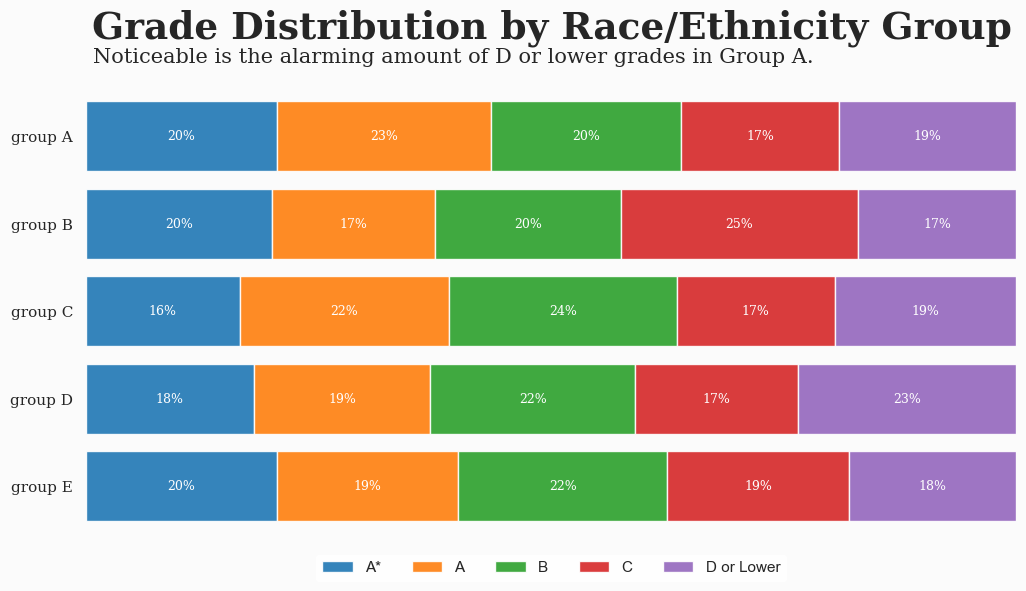

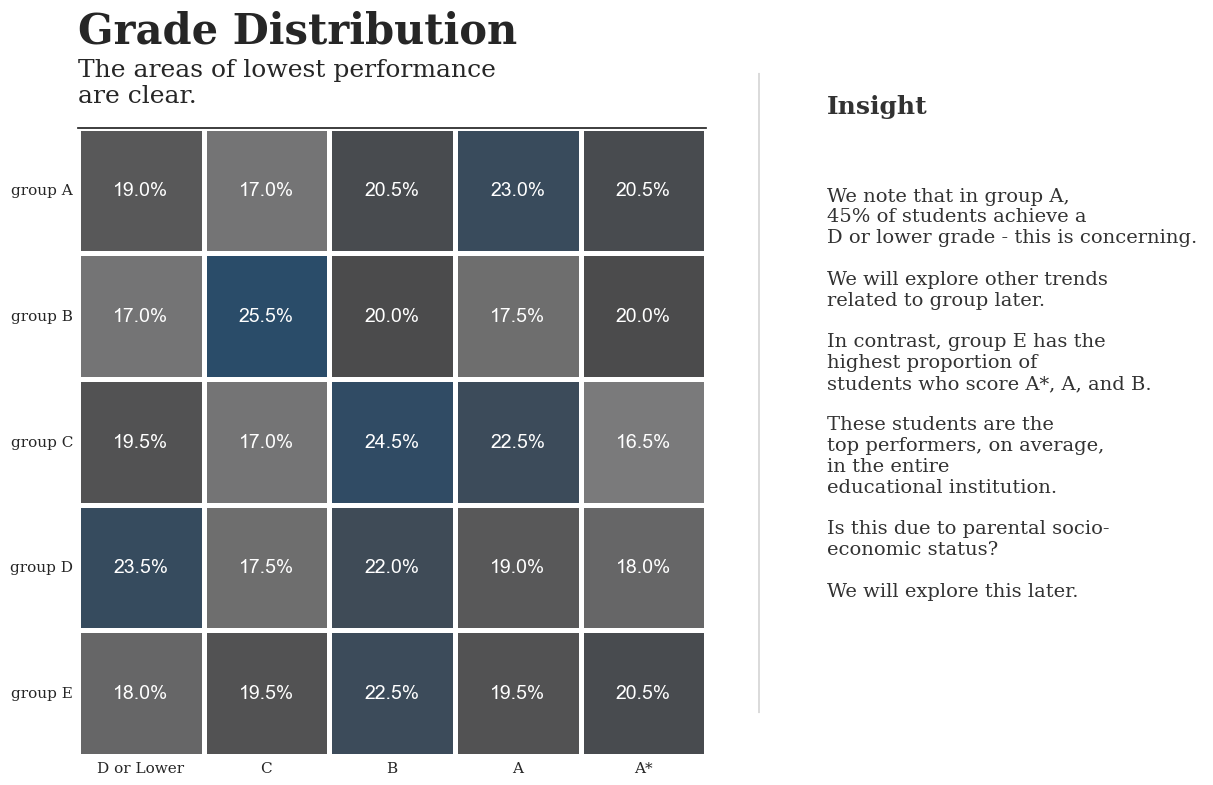

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

# Sample data creation for demonstration
# Replace this with your actual DataFrame
data = {
    'race/ethnicity': ['group A', 'group B', 'group C', 'group D', 'group E'] * 200,
    'placing': np.random.choice(['A*', 'A', 'B', 'C', 'D or Lower'], 1000),
}
df = pd.DataFrame(data)

# Calculate grade distribution ratio
placing_order = ['A*', 'A', 'B', 'C', 'D or Lower']
group_order = ['group A', 'group B', 'group C', 'group D', 'group E']
race_place = df.groupby('race/ethnicity')['placing'].value_counts().unstack().loc[group_order]
race_place = race_place.fillna(0)  # Fill NaNs with 0 for calculations
race_place['sum'] = race_place.sum(axis=1)
race_place_ratio = (race_place.T / race_place['sum']).T[placing_order][::-1]

# Change background color
background_color = "#fbfbfb"

fig, ax = plt.subplots(1, 1, figsize=(12, 6))
fig.patch.set_facecolor(background_color)
ax.set_facecolor(background_color)

# Plotting stacked horizontal bar chart
bottoms = np.zeros(len(race_place_ratio.index))  # Initialize bottoms for stacking

for col in placing_order:
    ax.barh(race_place_ratio.index, race_place_ratio[col], left=bottoms, color=plt.cm.get_cmap('tab10')(placing_order.index(col)), alpha=0.9, label=col)
    bottoms += race_place_ratio[col]  # Update the bottom position for stacking

ax.set_xlim(0, 1)
ax.set_xticks([])
ax.set_yticks(range(len(race_place_ratio.index)))
ax.set_yticklabels(race_place_ratio.index, fontfamily='serif', fontsize=11)

# Percentage labels for each placing
bottoms = np.zeros(len(race_place_ratio.index))  # Reinitialize bottoms for accurate annotation
for col in placing_order:
    for i in range(len(race_place_ratio.index)):
        xpos = bottoms[i] + race_place_ratio[col].iloc[i] / 2
        ax.annotate(f"{int(race_place_ratio[col].iloc[i] * 100)}%", xy=(xpos, i), va='center', ha='center', fontsize=9, fontweight='light', fontfamily='serif', color='white')
        bottoms[i] += race_place_ratio[col].iloc[i]

fig.text(0.13, 0.95, 'Grade Distribution by Race/Ethnicity Group', fontsize=27, fontweight='bold', fontfamily='serif')
fig.text(0.131, 0.91, 'Noticeable is the alarming amount of D or lower grades in Group A.', fontsize=15, fontfamily='serif')

for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)

ax.legend(loc='lower center', ncol=5, facecolor='white', edgecolor='white', bbox_to_anchor=(0.5, -0.1))
plt.show()

# Heatmap of grade distribution
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
placing_order_2 = ['D or Lower', 'C', 'B', 'A', 'A*']

colors = ["lightgray", "#4b4b4c", "#0f4c81"]
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)

hm = pd.crosstab(df['race/ethnicity'], df['placing'], normalize="index").loc[group_order, placing_order_2]

sns.heatmap(hm, square=True, linewidth=2.5, cbar=False, cmap=cmap, annot=True, fmt='.1%', vmax=.3, vmin=0.1, ax=ax, annot_kws={"fontsize":14})

ax.spines['top'].set_visible(True)
ax.set_yticklabels(ax.get_yticklabels(), fontfamily='serif', rotation=0, fontsize=11)
ax.set_xticklabels(ax.get_xticklabels(), fontfamily='serif', rotation=0, fontsize=11)

ax.text(0, -0.68, 'Grade Distribution', fontsize=30, fontweight='bold', fontfamily='serif')
ax.text(0, -0.2, 'The areas of lowest performance\nare clear.', fontsize=18, fontfamily='serif')

ax.set_ylabel('')
ax.set_xlabel('')
ax.tick_params(axis='both', which='both', length=0)

fig.text(1.085, 0.85, 'Insight', fontsize=18, fontweight='bold', fontfamily='serif', color='#323232')
fig.text(1.085, 0.22, '''
We note that in group A, 
45% of students achieve a 
D or lower grade - this is concerning. 

We will explore other trends
related to group later.

In contrast, group E has the
highest proportion of
students who score A*, A, and B. 

These students are the 
top performers, on average, 
in the entire
educational institution. 

Is this due to parental socio-
economic status? 

We will explore this later.
''', fontsize=14, fontweight='light', fontfamily='serif', color='#323232')

import matplotlib.lines as lines
l1 = lines.Line2D([1, 1], [0.1, 0.9], transform=fig.transFigure, figure=fig, color='black', lw=0.2)
fig.lines.extend([l1])

plt.tight_layout()
plt.show()

C:\Users\Deeya Shalya\AppData\Local\Temp\ipykernel_19464\2160121007.py:40: FutureWarning: The provided callable <function sum at 0x0000018C5E395E40> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pd.pivot_table(df, values='count', index=['race/ethnicity'], columns=['parental level of education'], aggfunc=np.sum).loc[ethnicity_order, par_ed_order],
C:\Users\Deeya Shalya\AppData\Local\Temp\ipykernel_19464\2160121007.py:67: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


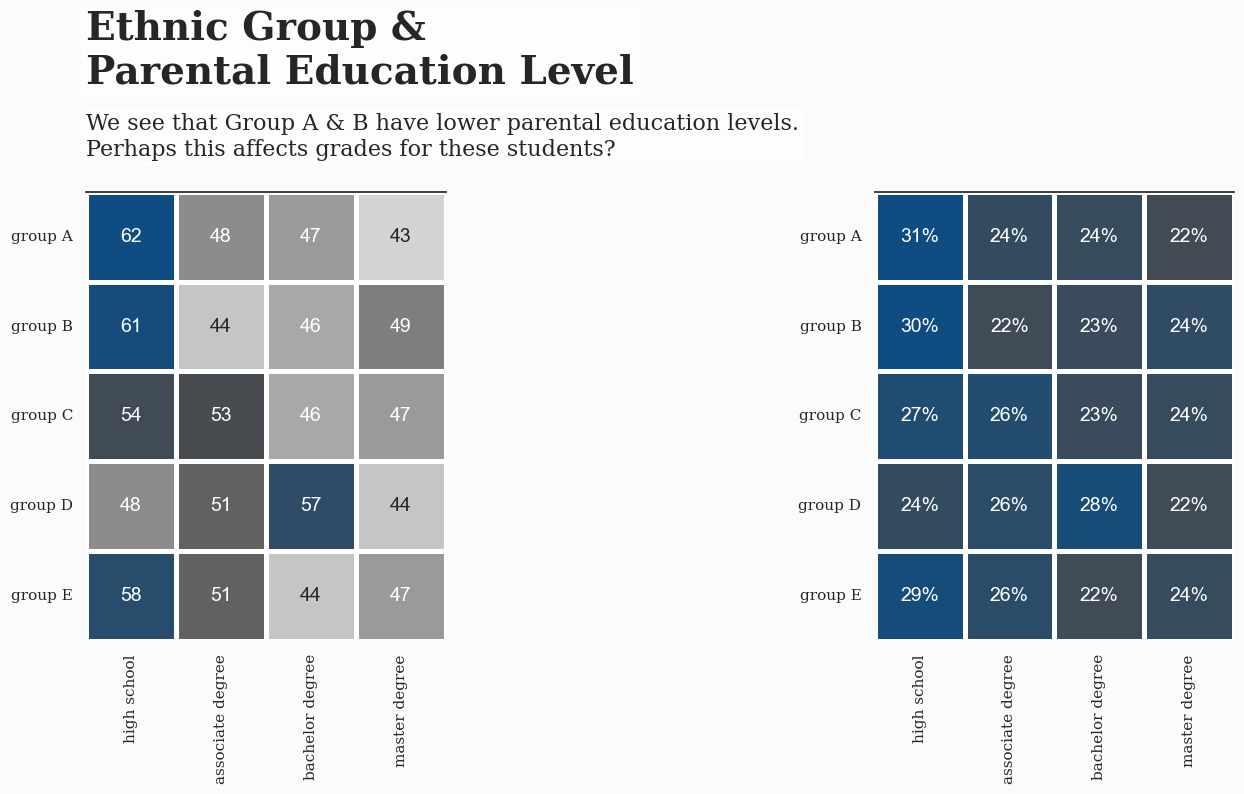

C:\Users\Deeya Shalya\AppData\Local\Temp\ipykernel_19464\2160121007.py:104: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


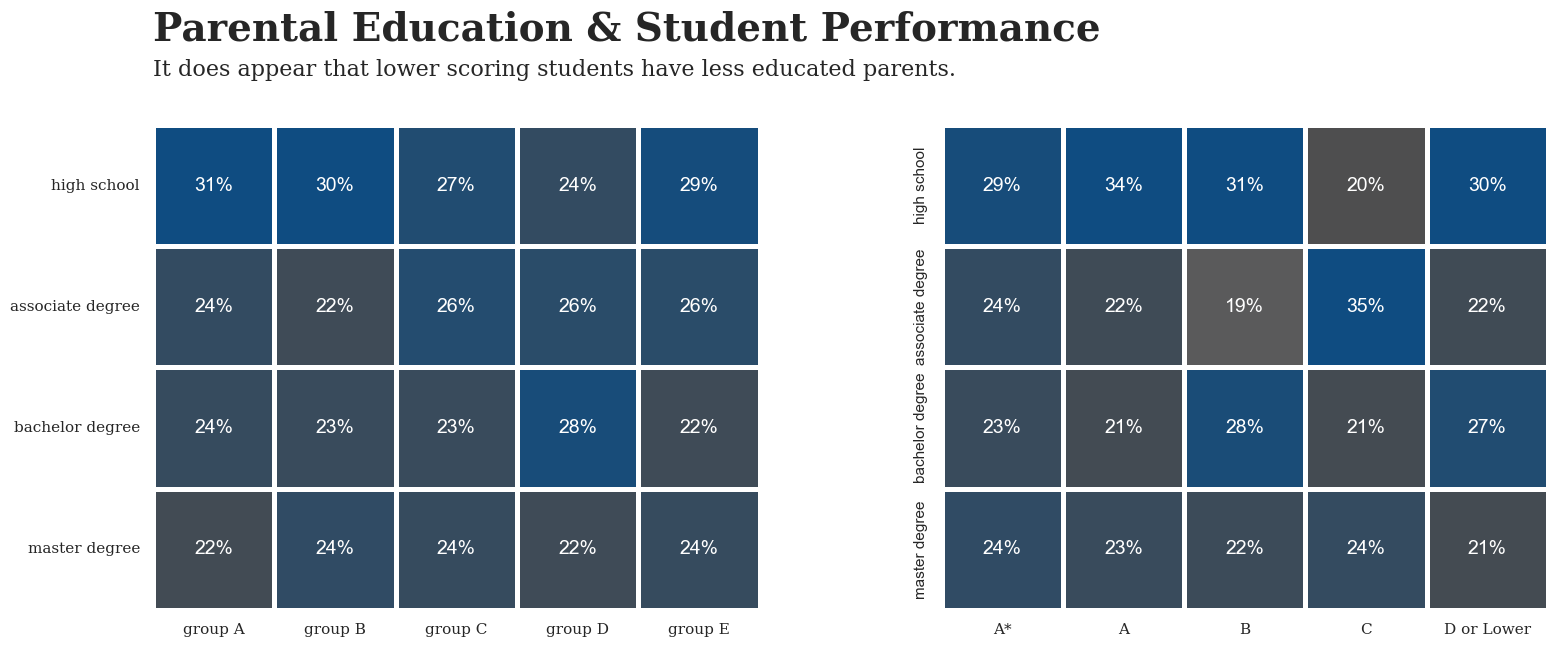

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

# Sample Data
data = {
    'race/ethnicity': ['group A', 'group B', 'group C', 'group D', 'group E'] * 200,
    'parental level of education': np.random.choice(['high school', 'associate degree', 'bachelor degree', 'master degree'], 1000),
    'placing': np.random.choice(['A*', 'A', 'B', 'C', 'D or Lower'], 1000)
}
df = pd.DataFrame(data)

# Define orders
ethnicity_order = ['group A', 'group B', 'group C', 'group D', 'group E']
par_ed_order = ['high school', 'associate degree', 'bachelor degree', 'master degree']
placing_order = ['A*', 'A', 'B', 'C', 'D or Lower']

df['count'] = 1

# First Set of Heatmaps
fig = plt.figure(figsize=(18, 14))
gs = fig.add_gridspec(2, 2)
gs.update(wspace=0.3, hspace=0.4)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])

# Change background color
background_color = "#fbfbfb"
fig.patch.set_facecolor(background_color)
ax0.set_facecolor(background_color)
ax1.set_facecolor(background_color)

colors = ["lightgray", "#4b4b4c", "#0f4c81"]
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)

# Heatmap 1
sns.heatmap(
    pd.pivot_table(df, values='count', index=['race/ethnicity'], columns=['parental level of education'], aggfunc=np.sum).loc[ethnicity_order, par_ed_order], 
    cmap=cmap, square=True, linewidth=2.5, cbar=False, ax=ax0,
    annot=True, fmt="d", annot_kws={"fontsize":14}
)
ax0.spines['top'].set_visible(True)
ax0.set_yticklabels(ax0.get_yticklabels(), fontfamily='serif', rotation=0, fontsize=11)
ax0.set_xticklabels(ax0.get_xticklabels(), fontfamily='serif', rotation=90, fontsize=11)

# Heatmap 2
sns.heatmap(
    pd.crosstab(df['race/ethnicity'], df['parental level of education'], normalize="index").loc[ethnicity_order, par_ed_order],
    cmap=cmap, square=True, linewidth=2.5, cbar=False, ax=ax1,
    annot=True, fmt='1.0%', vmax=.3, vmin=0.1, annot_kws={"fontsize":14}
)
ax1.spines['top'].set_visible(True)
ax1.set_yticklabels(ax1.get_yticklabels(), fontfamily='serif', rotation=0, fontsize=11)
ax1.set_xticklabels(ax1.get_xticklabels(), fontfamily='serif', rotation=90, fontsize=11)

# Text Annotations
ax0.text(0, -1.2, 'Ethnic Group & \nParental Education Level', fontsize=28, fontweight='bold', fontfamily='serif', bbox=dict(facecolor='white', edgecolor='none', alpha=0.7))
ax0.text(0, -0.4, 'We see that Group A & B have lower parental education levels.\nPerhaps this affects grades for these students?', fontsize=16, fontfamily='serif', bbox=dict(facecolor='white', edgecolor='none', alpha=0.7))

ax0.set_xlabel('')
ax0.set_ylabel('')
ax1.set_xlabel('')
ax1.set_ylabel('')

plt.tight_layout()
plt.show()

# Second Set of Heatmaps
fig = plt.figure(figsize=(18, 10))
gs = fig.add_gridspec(1, 2)
gs.update(wspace=0.3, hspace=0.5)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])

# Heatmap 3
sns.heatmap(
    pd.crosstab(df['race/ethnicity'], df['parental level of education'], normalize="index").loc[ethnicity_order, par_ed_order].T,
    cmap=cmap, square=True, linewidth=2.5, cbar=False, ax=ax0,
    annot=True, fmt='1.0%', vmax=.3, vmin=0.1, annot_kws={"fontsize":14}
)

# Heatmap 4
sns.heatmap(
    pd.crosstab(df['placing'], df['parental level of education'], normalize="index").loc[placing_order, par_ed_order].T,
    cmap=cmap, square=True, linewidth=2.5, cbar=False, ax=ax1,
    annot=True, fmt='1.0%', vmax=.3, vmin=0.1, annot_kws={"fontsize":14}
)

# Adjust Labels
ax0.set_ylabel('')
ax0.set_xlabel('')
ax1.set_ylabel('')
ax1.set_xlabel('')
ax0.set_yticklabels(ax0.get_yticklabels(), fontfamily='serif', rotation=0, fontsize=11)
ax0.set_xticklabels(ax0.get_xticklabels(), fontfamily='serif', rotation=0, fontsize=11)
ax1.set_xticklabels(ax1.get_xticklabels(), fontfamily='serif', rotation=0, fontsize=11)

# Text Annotations
ax0.text(0, -0.7, 'Parental Education & Student Performance', fontsize=28, fontweight='bold', fontfamily='serif', bbox=dict(facecolor='white', edgecolor='none', alpha=0.7))
ax0.text(0, -0.4, 'It does appear that lower scoring students have less educated parents.', fontsize=16, fontfamily='serif', bbox=dict(facecolor='white', edgecolor='none', alpha=0.7))

plt.tight_layout()
plt.show()

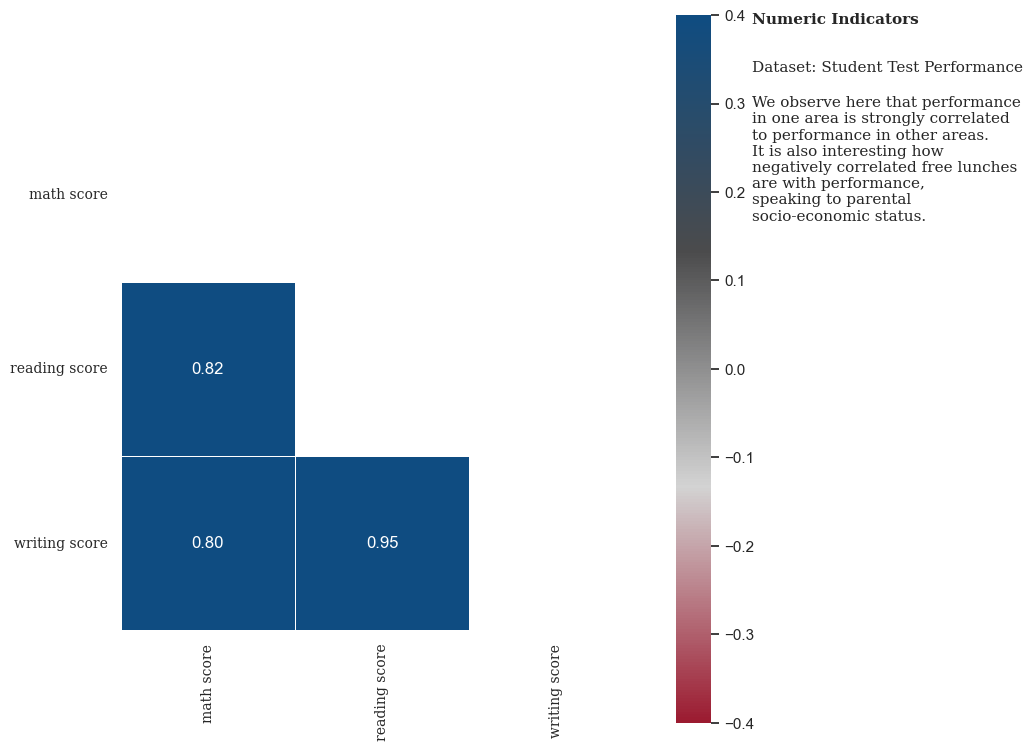

In [19]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd

# Load your dataset (replace this with your actual file path)
df = pd.read_csv('E:/PROJECT-AI-ML/Student Performance Visualization/StudentsPerformance.csv')

# Create a DataFrame with only continuous numerical columns
df_conts = df[['math score', 'reading score', 'writing score']]

# Create the plot
fig, ax = plt.subplots(1, 1, figsize=(8, 8))  # Adjusted size for better fitting on screen

# Calculate correlation matrix
corr = df_conts.corr()

# Create a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Define colors and colormap
colors = ["#9b1b30", "lightgray", "#4b4b4c", "#0f4c81"]
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)

# Plot heatmap
sns.heatmap(corr, 
            square=True, 
            mask=mask,
            linewidths=0.5,  # Reduced linewidth for better fit
            vmax=0.4, vmin=-0.4, 
            cmap=cmap, 
            cbar=True, 
            ax=ax, 
            annot=True, 
            fmt=".2f")  # Format annotations to two decimal places

# Set labels
ax.set_yticklabels(ax.get_xticklabels(), fontfamily='serif', rotation=0, fontsize=10)
ax.set_xticklabels(ax.get_xticklabels(), fontfamily='serif', rotation=90, fontsize=10)

# Add text annotations
fig.text(0.95, 0.96, 'Numeric Indicators', fontweight='bold', fontfamily='serif', fontsize=11, ha='left')    
fig.text(0.95, 0.90, 'Dataset: Student Test Performance', fontweight='light', fontfamily='serif', fontsize=11, ha='left')    

fig.text(0.95, 0.89, '''
We observe here that performance 
in one area is strongly correlated 
to performance in other areas.
It is also interesting how
negatively correlated free lunches 
are with performance, 
speaking to parental 
socio-economic status.''', 
         fontweight='light', fontfamily='serif', fontsize=11, va='top', ha='left') 

plt.tight_layout()
plt.show()

In [20]:
print(df.columns)

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')
